In [1]:
import lightgbm as lgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
# from tqdm.notebook import tqdm
from collections import defaultdict
# from tqdm.notebook import tqdm
from  sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',None)
import gc
import json
import pickle
import sys
import dill
from sklearn.decomposition import PCA
TARGET = 'answered_correctly'

In [2]:
base = pd.read_feather('../features/all_data/BASE_FIX_valid.feather')
loop = pd.read_feather('../features/all_data/LOOP_FIX3_valid.feather')
# mean = pd.read_feather('../features/all_data/ROLLING_MEAN_train.feather')

In [3]:
df = pd.concat([base,loop],axis=1)

In [4]:
del base,loop

In [7]:
df[['elapsed_time_user_sum','prior_question_elapsed_time','user_id']]

,elapsed_time_user_sum,prior_question_elapsed_time,user_id
0,NaN,NaN,45001
1,0.0,24000.0,45001
2,24000.0,19000.0,45001
3,43000.0,18000.0,45001
4,61000.0,15000.0,45001
...,...,...,...
2453881,5281000.0,16000.0,2147482216
2453882,5297000.0,15000.0,2147482216
2453883,5312000.0,18000.0,2147482216
2453884,5330000.0,16000.0,2147482216


In [5]:
df[['rolling_mean_10',TARGET]].groupby('rolling_mean_10').mean()

,answered_correctly
rolling_mean_10,
0.0,0.328520
0.1,0.378509
0.2,0.437481
0.3,0.501096
0.4,0.559164
0.5,0.608120
0.6,0.647380
0.7,0.681615
0.8,0.715892


In [24]:
dd = defaultdict(str)

In [27]:
dd = defaultdict(str)
for i in range(5):
    dd[123] += '0'
    dd[123] += '1'

In [32]:
dd[123] = dd[123][1:]
dd[123] += '1'
dd[123]

'1010101011'

In [21]:
a[]

'01110101011'

In [13]:
a.count('1')

6

In [11]:
b = 0b0000000000

In [12]:
b

0

In [5]:
base = pd.read_feather('../features/all_data/BASE_FIX_train.feather')
# loop = pd.read_feather('../features/all_data/LOOP_FIX2_train.feather')
# bundle = pd.read_feather('../features/all_data/BUNDLE_ID_train.feather')

In [4]:
df = pd.concat([base,loop,bundle],axis=1)
del base,loop,bundle

In [10]:
base.sort_values('row_id')

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,viretual_time_stamp,bundle_id,correct_answer,part,tags,tags1,tags2,tags3,tags4,tags5,tags6,community,part_community
0,0,0,115,5692,0,1,3,1,NaN,0,77886501365,5692,3,5,151,151.0,NaN,NaN,NaN,NaN,NaN,0,50
1,1,56943,115,5716,0,2,2,1,37000.0,0,77886558308,5716,2,5,168,168.0,NaN,NaN,NaN,NaN,NaN,0,50
2,2,118363,115,128,0,0,0,1,55000.0,0,77886619728,128,0,1,131 149 92,131.0,149.0,92.0,NaN,NaN,NaN,2,12
3,3,131167,115,7860,0,3,0,1,19000.0,0,77886632532,7860,0,1,131 104 81,131.0,104.0,81.0,NaN,NaN,NaN,2,12
4,4,137965,115,7922,0,4,1,1,11000.0,0,77886639330,7922,1,1,131 149 92,131.0,149.0,92.0,NaN,NaN,NaN,2,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96817409,101230327,428564420,2147482888,3586,0,22,0,1,18000.0,1,39842645835,3586,0,5,8,8.0,NaN,NaN,NaN,NaN,NaN,1,51
96817410,101230328,428585000,2147482888,6341,0,23,3,1,14000.0,1,39842666415,6341,3,5,60,60.0,NaN,NaN,NaN,NaN,NaN,1,51
96817411,101230329,428613475,2147482888,4212,0,24,3,1,14000.0,1,39842694890,4212,3,5,95,95.0,NaN,NaN,NaN,NaN,NaN,0,50
96817412,101230330,428649406,2147482888,6343,0,25,1,0,22000.0,1,39842730821,6343,0,5,60,60.0,NaN,NaN,NaN,NaN,NaN,1,51


In [2]:
df[['user_id',TARGET,'user_rolling_ans_mean10']][100:120]

NameError: name 'df' is not defined

In [14]:
df_user = df[df['user_id'] == 801103753]

In [22]:
df_user['rolling_mean'] = df[df['user_id'] == 801103753]['answered_correctly'].rolling(3).mean()

/home/zakopuro/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
df['rolling_mean_10'] = df.groupby(['user_id'])['answered_correctly'].transform(lambda x: x.shift(1).rolling(10).mean())
df['rolling_mean_3'] = df.groupby(['user_id'])['answered_correctly'].transform(lambda x: x.shift(1).rolling(3).mean())

In [30]:
np.mean([1,2,3,4])

2.5

In [26]:
df[['answered_correctly','rolling_mean_3']].groupby('rolling_mean_3').mean()

,answered_correctly
rolling_mean_3,
0.000000,0.482357
0.333333,0.584246
0.666667,0.664261
1.000000,0.738121


In [27]:
df[['answered_correctly','rolling_mean_10']].groupby('rolling_mean_10').mean()

,answered_correctly
rolling_mean_10,
0.0,0.299538
0.1,0.349157
0.2,0.408784
0.3,0.480085
0.4,0.547631
0.5,0.603391
0.6,0.646878
0.7,0.684209
0.8,0.721268


In [29]:
df[['answered_correctly','rolling_mean_10','rolling_mean_3']][-30:]

,answered_correctly,rolling_mean_10,rolling_mean_3
96817384,1,0.7,1.000000
96817385,1,0.7,1.000000
96817386,1,0.8,1.000000
96817387,1,NaN,NaN
96817388,1,NaN,NaN
96817389,1,NaN,NaN
96817390,0,NaN,1.000000
96817391,1,NaN,0.666667
96817392,1,NaN,0.666667
96817393,0,NaN,0.666667


In [5]:
df['first_bundle_cut'].value_counts()

9999.0    54039161
7900.0    35710407
128.0      5449025
5692.0     1354131
7876.0       49613
175.0        45025
1232.0       43955
1278.0       39603
2063.0       33979
3363.0       30864
4528.0       21651
Name: first_bundle_cut, dtype: int64

In [38]:
df[~df.duplicated(subset=['user_id'],keep='first')]['bundle_id'].value_counts()[:10]

7900    144467
128      13770
5692      3123
7876       199
2063       182
3363       162
1278       151
175        121
1232       118
4528       105
Name: bundle_id, dtype: int64

In [10]:
first_bundle_df = pd.DataFrame(df['first_bundle'].value_counts()).reset_index()

In [11]:
first_bundle_df.columns = ['first_bundle','count']

In [32]:
first_bundle_df[first_bundle_df['count'] >= 20000]

,first_bundle,count
0,7900.0,35710407
1,128.0,5449025
2,5692.0,1354131
3,7876.0,49613
4,175.0,45025
...,...,...
915,4135.0,20030
916,4903.0,20029
917,5999.0,20024
918,4349.0,20015


In [34]:
df[df['first_bundle'] == 5129.0]['user_id'].value_counts()

202053467     2773
775923189     2757
378621666     2396
2141470164    1398
201503852     1349
              ... 
1531323695      13
705432370       12
829264169       12
586141070        8
667750760        7
Name: user_id, Length: 71, dtype: int64

In [7]:
df[(df['user_id'] == 115) & (df['bundle_id'] == 3363)]

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,viretual_time_stamp,bundle_id,correct_answer,part,tags,tags1,tags2,tags3,tags4,tags5,tags6,community,part_community,ans_user_avg,ans_user_count,elapsed_time_user_avg,explanation_user_avg,first_bundle,ans_content_avg,elapsed_time_content_avg,explanation_content_avg,lag_time_1,lag_time_2,lag_time_3,lag_incorrect_time,lag_part_time_1,lag_part_time_2,lag_part_time_3,lag_part_incorrect_time,ans_user_part_avg,ans_user_community_avg,user_content_count,user_bundle_count,user_part_count,user_community_count
43,43,668090043,115,3363,0,41,1,0,14333.0,0,78554591408,3363,3,4,74 103 29,74.0,103.0,29.0,NaN,NaN,NaN,2,42,0.704545,44.0,19987.259766,0.136364,5692.0,NaN,NaN,NaN,118231.0,118231.0,118231.0,118231.0,NaN,NaN,NaN,NaN,NaN,0.690476,0,0,0,42
44,44,668090043,115,3365,0,41,0,0,14333.0,0,78554591408,3363,2,4,136 103 29,136.0,103.0,29.0,NaN,NaN,NaN,2,42,0.704545,44.0,20313.009766,0.136364,5692.0,NaN,NaN,NaN,0.0,118231.0,118231.0,118231.0,0.0,NaN,NaN,NaN,NaN,0.690476,0,1,0,42
45,45,668090043,115,3364,0,41,1,1,14333.0,0,78554591408,3363,1,4,136 103 29,136.0,103.0,29.0,NaN,NaN,NaN,2,42,0.704545,44.0,20638.759766,0.136364,5692.0,NaN,NaN,NaN,0.0,0.0,118231.0,118231.0,0.0,0.0,NaN,NaN,NaN,0.690476,0,2,0,42


In [9]:
df.iloc[35:48]

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,viretual_time_stamp,bundle_id,correct_answer,part,tags,tags1,tags2,tags3,tags4,tags5,tags6,community,part_community,ans_user_avg,ans_user_count,elapsed_time_user_avg,explanation_user_avg,first_bundle,ans_content_avg,elapsed_time_content_avg,explanation_content_avg,lag_time_1,lag_time_2,lag_time_3,lag_incorrect_time,lag_part_time_1,lag_part_time_2,lag_part_time_3,lag_part_incorrect_time,ans_user_part_avg,ans_user_community_avg,user_content_count,user_bundle_count,user_part_count,user_community_count
35,35,1320874,115,167,0,35,2,1,19000.0,1,77887822239,167,2,1,131 130 162 38,131.0,130.0,162.0,38.0,NaN,NaN,2,12,0.714286,35.0,20983.984375,0.057143,5692.0,NaN,NaN,NaN,36780.0,68253.0,101250.0,588453.0,36780.0,68253.0,101250.0,588453.0,0.696970,0.696970,0,0,33,33
36,36,1359412,115,7897,0,36,3,0,17000.0,1,77887860777,7897,0,1,61 110 162 92,61.0,110.0,162.0,92.0,NaN,NaN,2,12,0.722222,36.0,20928.873047,0.083333,5692.0,NaN,NaN,NaN,38538.0,75318.0,106791.0,626991.0,38538.0,75318.0,106791.0,626991.0,0.705882,0.705882,0,0,34,34
37,37,1415188,115,7882,0,37,2,1,20000.0,1,77887916553,7882,2,1,51 131 102,51.0,131.0,102.0,NaN,NaN,NaN,2,12,0.702703,37.0,20822.687500,0.108108,5692.0,NaN,NaN,NaN,55776.0,94314.0,131094.0,55776.0,55776.0,94314.0,131094.0,55776.0,0.685714,0.685714,0,0,35,35
38,38,1468285,115,7962,0,38,3,1,17000.0,1,77887969650,7962,3,1,51 131 92,51.0,131.0,92.0,NaN,NaN,NaN,2,12,0.710526,38.0,20801.037109,0.131579,5692.0,NaN,NaN,NaN,53097.0,108873.0,147411.0,108873.0,53097.0,108873.0,147411.0,108873.0,0.694444,0.694444,0,0,36,36
39,39,667861680,115,1278,0,39,3,1,21000.0,0,78554363045,1278,3,2,143 140 81 29,143.0,140.0,81.0,29.0,NaN,NaN,2,22,0.717949,39.0,20703.576172,0.153846,5692.0,NaN,NaN,NaN,666393408.0,666446464.0,666502272.0,666502272.0,NaN,NaN,NaN,NaN,NaN,0.702703,0,0,0,37
40,40,667971812,115,2065,0,40,2,1,17000.0,0,78554473177,2063,2,3,136 162 92 29,136.0,162.0,92.0,29.0,NaN,NaN,2,32,0.725000,40.0,20710.986328,0.150000,5692.0,NaN,NaN,NaN,110132.0,666503552.0,666556608.0,666612416.0,NaN,NaN,NaN,NaN,NaN,0.710526,0,0,0,38
41,41,667971812,115,2064,0,40,1,1,17000.0,0,78554473177,2063,1,3,157 92 29,157.0,92.0,29.0,NaN,NaN,NaN,2,32,0.725000,40.0,21135.986328,0.150000,5692.0,NaN,NaN,NaN,0.0,110132.0,666503552.0,666612416.0,0.0,NaN,NaN,NaN,NaN,0.710526,0,1,0,38
42,42,667971812,115,2063,0,40,3,0,17000.0,0,78554473177,2063,0,3,136 92 29,136.0,92.0,29.0,NaN,NaN,NaN,2,32,0.725000,40.0,21560.986328,0.150000,5692.0,NaN,NaN,NaN,0.0,0.0,110132.0,666612416.0,0.0,0.0,NaN,NaN,NaN,0.710526,0,2,0,38
43,43,668090043,115,3363,0,41,1,0,14333.0,0,78554591408,3363,3,4,74 103 29,74.0,103.0,29.0,NaN,NaN,NaN,2,42,0.704545,44.0,19987.259766,0.136364,5692.0,NaN,NaN,NaN,118231.0,118231.0,118231.0,118231.0,NaN,NaN,NaN,NaN,NaN,0.690476,0,0,0,42
44,44,668090043,115,3365,0,41,0,0,14333.0,0,78554591408,3363,2,4,136 103 29,136.0,103.0,29.0,NaN,NaN,NaN,2,42,0.704545,44.0,20313.009766,0.136364,5692.0,NaN,NaN,NaN,0.0,118231.0,118231.0,118231.0,0.0,NaN,NaN,NaN,NaN,0.690476,0,1,0,42


In [12]:
train = pd.read_feather('../data/input/train.feather')

In [24]:
train = train.loc[train.content_type_id == False].reset_index(drop = True)

In [25]:
qs = pd.read_csv('../data/input/questions.csv')
tag = qs["tags"].str.split(" ",expand = True)
tag.columns = ['tags1','tags2','tags3','tags4','tags5','tags6']
qs = pd.concat([qs,tag],axis=1)
qs_cmnts = pd.read_csv('../data/input/question_cmnts.csv')
qs = pd.merge(qs,qs_cmnts,on='question_id',how='left')
qs = qs.rename(columns={'question_id':'content_id'})

train = pd.merge(train,qs,on='content_id',how='left')

In [39]:
train[train['prior_question_elapsed_time'] == 0]

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,bundle_id,correct_answer,part,tags,tags1,tags2,tags3,tags4,tags5,tags6,community
20110,20535,2912969748,275762,7964,0,141,2,0,0.0,True,7964,0,1,61 110 102,61,110,102,None,None,None,2
20177,20603,3247775151,275762,7898,0,208,1,0,0.0,True,7898,2,1,131 99 29,131,99,29,None,None,None,2
24450,24948,40688,457531,6116,0,11,2,0,0.0,False,6116,3,5,23,23,None,None,None,None,None,1
44770,45617,23975123,1214143,279,0,85,1,0,0.0,True,279,0,2,138 41 38 81,138,41,38,81,None,None,2
47106,48013,4176303497,1272775,632,0,220,0,0,0.0,True,632,3,2,2 107 62 81 29,2,107,62,81,29,None,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99246709,101205169,21828663443,2146986426,4853,0,3234,3,1,0.0,True,4853,3,5,55,55,None,None,None,None,None,1
99247224,101205692,22061629349,2146986426,6209,0,3620,1,1,0.0,True,6209,1,5,8,8,None,None,None,None,None,1
99247397,101205865,22348280724,2146986426,5110,0,3733,0,1,0.0,True,5110,0,5,8,8,None,None,None,None,None,1
99258392,101217180,5262223957,2147143229,9407,0,189,2,1,0.0,True,9407,2,5,53,53,None,None,None,None,None,1


In [41]:
# train[train['user_id'] == 275762]
train.iloc[20105:20114]

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,bundle_id,correct_answer,part,tags,tags1,tags2,tags3,tags4,tags5,tags6,community
20105,20530,2912025974,275762,8511,0,137,2,1,14000.0,True,8511,2,5,116,116,None,None,None,None,None,1
20106,20531,2912146422,275762,6682,0,138,0,1,20000.0,True,6682,0,5,45,45,None,None,None,None,None,0
20107,20532,2912403525,275762,5700,0,139,0,1,20000.0,True,5700,0,5,166,166,None,None,None,None,None,0
20108,20533,2912598994,275762,4478,0,140,3,0,10000.0,True,4478,0,5,159,159,None,None,None,None,None,1
20109,20534,2912925246,275762,7898,0,114,2,1,20000.0,False,7898,2,1,131 99 29,131,99,29,None,None,None,2
20110,20535,2912969748,275762,7964,0,141,2,0,0.0,True,7964,0,1,61 110 102,61,110,102,None,None,None,2
20111,20536,2913236740,275762,10516,0,142,2,1,27000.0,False,10516,2,1,10 178 92,10,178,92,None,None,None,2
20112,20537,2913319787,275762,187,0,143,2,0,21000.0,True,187,3,1,131 99 102,131,99,102,None,None,None,2
20113,20538,2913415341,275762,144,0,144,0,1,26000.0,True,144,0,1,131 13 92,131,13,92,None,None,None,2


In [49]:
train[train['prior_question_elapsed_time'] == 17000.0]

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,bundle_id,correct_answer,part,tags,tags1,tags2,tags3,tags4,tags5,tags6,community
6,6,176092,115,51,0,6,0,1,17000.0,False,51,0,1,131 187 81,131,187,81,None,None,None,2
7,7,194190,115,50,0,7,3,1,17000.0,False,50,3,1,131 101 38,131,101,38,None,None,None,2
10,10,255381,115,152,0,10,2,0,17000.0,False,152,1,1,131 5 162 81,131,5,162,81,None,None,2
19,19,468511,115,7927,0,19,3,1,17000.0,False,7927,3,1,10 178 29,10,178,29,None,None,None,2
36,36,1359412,115,7897,0,36,3,0,17000.0,True,7897,0,1,61 110 162 92,61,110,162,92,None,None,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99271235,101230267,1416570571,2147482216,4981,0,242,0,1,17000.0,True,4981,0,5,115,115,None,None,None,None,None,0
99271244,101230276,1417001197,2147482216,801,0,251,0,1,17000.0,True,801,0,2,143 20 38 29,143,20,38,29,None,None,2
99271250,101230282,1417154834,2147482216,1290,0,257,3,1,17000.0,True,1290,3,2,17 56 92 29,17,56,92,29,None,None,2
99271255,101230287,1470092175,2147482216,6273,0,262,1,1,17000.0,True,6273,1,5,123,123,None,None,None,None,None,1


In [46]:
train[[TARGET,'prior_question_elapsed_time']].groupby('prior_question_elapsed_time').mean().iloc[:10]

,answered_correctly
prior_question_elapsed_time,
0.0,0.618971
200.0,0.715847
250.0,0.553957
333.0,0.698964
400.0,0.663158
500.0,0.314947
600.0,0.264132
666.0,0.641585
667.0,0.292714


In [48]:
train[train['prior_question_elapsed_time'] == 750.0]['user_id'].value_counts()

723872950     831
877547879     766
1565505837    756
2001399751    756
827597184     714
             ... 
297901094       1
461064083       1
907119059       1
989515621       1
1861184830      1
Name: user_id, Length: 972, dtype: int64

In [32]:
train[train['prior_question_elapsed_time'] == 17000.0]['tags1'].value_counts()

143    976184
62     391251
2      248065
90     246927
155    217654
        ...  
38         75
19         75
117        44
86         28
160        10
Name: tags1, Length: 117, dtype: int64

In [14]:
train[(train['user_id'] == 705741139) & (train['prior_question_elapsed_time'] ==0)]['timestamp'].value_counts()

1259124392     4
47152065156    3
47139072893    3
47136556889    3
47139383969    3
              ..
47138849428    1
47076424092    1
47138399134    1
47138605209    1
47152936207    1
Name: timestamp, Length: 105, dtype: int64

In [16]:
train[(train['user_id'] == 705741139) & (train['timestamp'] == 47138849428)]

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
32937304,32937304,47138849428,705741139,1252,0,2614,1,1,0.0,True


In [22]:
train['prior_question_elapsed_time'].value_counts()

17000.0     5154588
16000.0     4752104
18000.0     4670915
19000.0     4017031
15000.0     3640279
             ...   
252800.0          1
251200.0          1
297200.0          1
297600.0          1
270333.0          1
Name: prior_question_elapsed_time, Length: 3258, dtype: int64

In [23]:
train[train['prior_question_elapsed_time'] == 17000.0]

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
6,6,176092,115,51,0,6,0,1,17000.0,False
7,7,194190,115,50,0,7,3,1,17000.0,False
10,10,255381,115,152,0,10,2,0,17000.0,False
19,19,468511,115,7927,0,19,3,1,17000.0,False
36,36,1359412,115,7897,0,36,3,0,17000.0,True
...,...,...,...,...,...,...,...,...,...,...
101230267,101230267,1416570571,2147482216,4981,0,242,0,1,17000.0,True
101230276,101230276,1417001197,2147482216,801,0,251,0,1,17000.0,True
101230282,101230282,1417154834,2147482216,1290,0,257,3,1,17000.0,True
101230287,101230287,1470092175,2147482216,6273,0,262,1,1,17000.0,True


In [21]:
train[(train['user_id'] == 705741139)]['prior_question_elapsed_time'].value_counts()

17000.0     231
18000.0     224
0.0         186
16000.0     182
19000.0     169
           ... 
62750.0       1
50750.0       1
81000.0       1
80000.0       1
175000.0      1
Name: prior_question_elapsed_time, Length: 306, dtype: int64

In [19]:
train.iloc[32937280:32937305]

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
32937280,32937280,47137913480,705741139,3003,0,2595,2,1,0.0,True
32937281,32937281,47137913480,705741139,3004,0,2595,2,0,0.0,True
32937282,32937282,47137913480,705741139,3005,0,2595,0,1,0.0,True
32937283,32937283,47138014826,705741139,10540,1,2596,-1,-1,NaN,False
32937284,32937284,47138052625,705741139,16,0,2597,1,0,0.0,True
32937285,32937285,47138087079,705741139,130,0,2598,3,1,0.0,True
32937286,32937286,47138130611,705741139,1100,0,2600,3,0,0.0,True
32937287,32937287,47138166725,705741139,401,0,2601,3,1,0.0,True
32937288,32937288,47138202801,705741139,423,0,2602,1,1,0.0,True
32937289,32937289,47138247488,705741139,1146,0,2603,0,0,0.0,True


In [4]:
with open('../features/all_data/loop_feats_mini3.dill','rb') as f:
    d = dill.load(f)

In [6]:
del d['user_community_list']

In [15]:
for key in d.keys():
    print(key)
    print(sys.getsizeof(d[key]))

ans_user_count
20971632
ans_user_sum
20971632
elapsed_time_user_sum
20971632
explanation_user_sum
20971632
user_first_bundle
20971632
ans_content_count
589944
ans_content_sum
589944
elapsed_time_content_sum
589944
explanation_content_sum
589944
lag_user_time
20971632
lag_user_incorrect_time
20971632
user_content_count
20971632
lag_user_part_time
20971632
user_part_list
20971632


In [13]:
del d['user_bundle_count'],d['lag_user_part_incorrect_time']

In [14]:
with open('../data/input/loop_feats.dill','wb') as f:
    dill.dump(d,f)

In [2]:
base_train_df = pd.read_feather('../features/kernel_base/BASE_FIX_train.feather')
base_valid_df = pd.read_feather('../features/kernel_base/BASE_FIX_valid.feather')

loop_train_df = pd.read_feather('../features/kernel_base/LOOP_FIX_train.feather')
loop_valid_df = pd.read_feather('../features/kernel_base/LOOP_FIX_valid.feather')

In [3]:
train = pd.concat([base_train_df,loop_train_df],axis=1)

In [4]:
train.tail(1)

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,viretual_time_stamp,bundle_id,correct_answer,part,tags,tags1,tags2,tags3,tags4,tags5,tags6,ans_user_avg,ans_user_count,elapsed_time_user_avg,explanation_user_avg,ans_content_avg,elapsed_time_content_avg,explanation_content_avg,lag_time_1,lag_time_2,lag_time_3,lag_incorrect_time,lag_part_time_1,lag_part_time_2,lag_part_time_3,lag_part_incorrect_time,user_content_count,user_bundle_count
39213664,101230254,1309220022,2147482216,673,0,229,3,1,17000.0,1,82244852251,673,3,2,62 90 100 38 81,62.0,90.0,100.0,38.0,81.0,NaN,0.64,225.0,19068.601562,0.955556,0.928983,17994.302734,0.979452,21122.0,43771.0,64929.0,173891.0,21122.0,43771.0,64929.0,173891.0,0,0


In [6]:
train.iloc[49535:49548][['user_id','lag_part_time_1','timestamp','part','answered_correctly','ans_user_avg','ans_content_avg','bundle_id','content_id','user_bundle_count','user_content_count']]

,user_id,lag_part_time_1,timestamp,part,answered_correctly,ans_user_avg,ans_content_avg,bundle_id,content_id,user_bundle_count,user_content_count
49535,3233182,NaN,953623679,4,1,0.537688,0.636364,2860,2861,0,0
49536,3233182,0.0,953623679,4,1,0.537688,0.800000,2860,2860,1,0
49537,3233182,172061552.0,1002273207,6,1,0.544554,0.642857,6916,6917,0,0
49538,3233182,0.0,1002273207,6,1,0.544554,0.857143,6916,6918,1,0
49539,3233182,0.0,1002273207,6,1,0.544554,0.866667,6916,6916,2,0
49540,3233182,0.0,1002273207,6,1,0.544554,0.750000,6916,6919,3,0
49541,3233182,530058.0,1002803265,6,1,0.555556,0.619048,6865,6865,0,0
49542,3233182,0.0,1002803265,6,0,0.555556,0.800000,6865,6866,1,0
49543,3233182,0.0,1002803265,6,1,0.555556,0.894737,6865,6867,2,0
49544,3233182,0.0,1002803265,6,1,0.555556,0.840000,6865,6868,3,0


In [18]:
train[(train['user_id'] == 3233182) & (train['bundle_id'] == 6853)][['user_id','part','answered_correctly','ans_user_avg','bundle_id']]

,user_id,part,answered_correctly,ans_user_avg,bundle_id
49545,3233182,6,0,0.626316,6853
49546,3233182,6,0,0.623037,6853
49547,3233182,6,1,0.619792,6853
49548,3233182,6,0,0.616580,6853
50231,3233182,6,0,0.726027,6853
50232,3233182,6,0,0.725200,6853
50233,3233182,6,1,0.724374,6853
50234,3233182,6,1,0.723549,6853
50453,3233182,6,1,0.720401,6853
50454,3233182,6,1,0.719745,6853


In [9]:
FEATURES1 = ['prior_question_elapsed_time', 'prior_question_had_explanation', 'part', 'answered_correctly_u_avg', 'elapsed_time_u_avg', 'explanation_u_avg',
                'answered_correctly_q_avg', 'elapsed_time_q_avg', 'explanation_q_avg', 'answered_correctly_uq_count', 'timestamp_u_recency_1', 'timestamp_u_recency_2', 'timestamp_u_recency_3', 
                'timestamp_u_incorrect_recency']

FEATURES2 = ['prior_question_elapsed_time', 'prior_question_had_explanation', 'part',
            'ans_user_avg', 'elapsed_time_user_avg', 'explanation_user_avg',
            'ans_content_avg', 'elapsed_time_content_avg', 'explanation_content_avg',
            'user_content_count',
            'lag_time_1', 'lag_time_2', 'lag_time_3','lag_incorrect_time']

In [3]:
kernel_train = pd.read_feather('../features/kernel_base/kernel_train.feather')
kernel_valid = pd.read_feather('../features/kernel_base/kernel_valid.feather')

In [3]:
base_train_df = pd.read_feather('../features/kernel_base/BASE_train.feather')
base_valid_df = pd.read_feather('../features/kernel_base/BASE_valid.feather')

loop_train_df = pd.read_feather('../features/kernel_base/LOOP_FIX_train.feather')
loop_valid_df = pd.read_feather('../features/kernel_base/LOOP_FIX_valid.feather')

In [6]:
loop2_train_df = pd.read_feather('../features/kernel_base/KERNEL_LOOP_train.feather')
loop2_valid_df = pd.read_feather('../features/kernel_base/KERNEL_LOOP_valid.feather')

In [4]:
train = pd.concat([base_train_df,loop_train_df],axis=1)
valid = pd.concat([base_valid_df,loop_valid_df],axis=1)

In [7]:
train2 = pd.concat([base_train_df,loop2_train_df],axis=1)
valid2 = pd.concat([base_valid_df,loop2_valid_df],axis=1)

In [17]:
for i in range(len(FEATURES1)):
    train_mean = train[FEATURES2[i]].mean()
    train2_mean = train2[FEATURES2[i]].mean()
    if train_mean != train2_mean:
        print(f'{FEATURES2[i]}')
        print(f'{train_mean},{train2_mean}')

ans_user_avg
0.4384532868862152,0.4297584295272827
ans_content_avg
0.5319194793701172,0.42798858880996704
lag_incorrect_time
45416920.0,41876428.0


In [42]:
# train

In [30]:
df = pd.concat([train[['user_id','ans_user_avg','answered_correctly','bundle_id']],train2[['ans_user_avg']].rename(columns={'ans_user_avg':'ans_user_avg2'})],axis=1)

In [39]:
df[df['user_id'] == 1174413790]

,user_id,ans_user_avg,answered_correctly,bundle_id,ans_user_avg2
38696703,1174413790,NaN,1,5683,NaN
38696755,1174413790,1.000000,0,5902,1.000000
38696799,1174413790,0.500000,0,6310,0.500000
38696824,1174413790,0.333333,0,1294,0.333333
38696846,1174413790,0.250000,1,1287,0.250000
...,...,...,...,...,...
39212914,1174413790,0.559702,1,6279,0.507463
39212951,1174413790,0.561338,1,4434,0.509294
39213351,1174413790,0.562963,0,5329,0.511111
39213552,1174413790,0.560886,0,6255,0.509225


In [33]:
df[(df['ans_user_avg'] != df['ans_user_avg2']) & (~df['ans_user_avg'].isnull())][-40:]

,user_id,ans_user_avg,answered_correctly,bundle_id,ans_user_avg2
39213615,1174413790,0.558824,1,5287,0.507353
39213616,804150523,0.787623,1,6118,0.710267
39213617,1189905495,0.674869,0,6149,0.656021
39213618,1673708135,0.549536,1,8171,0.520254
39213619,511666221,0.714932,1,9906,0.647059
39213622,613829943,0.444444,0,3363,0.555556
39213623,1918209349,0.484419,1,1373,0.470255
39213624,932625141,0.726098,1,447,0.720930
39213625,301133696,0.742940,1,3859,0.627806
39213626,720408902,0.791762,1,9883,0.745233


In [27]:
train

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,viretual_time_stamp,bundle_id,correct_answer,part,tags,tags1,tags2,tags3,tags4,tags5,tags6,ans_user_avg,elapsed_time_user_avg,explanation_user_avg,ans_content_avg,elapsed_time_content_avg,explanation_content_avg,lag_time_1,lag_time_2,lag_time_3,lag_incorrect_time,user_content_count
0,65777135,24795237360,1398224364,1376,0,2668,3,0,17000.0,1,48375039202,1376,0,2,143 30 81 29,143.0,30.0,81.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,19375638,3704358600,417367243,5976,0,311,0,0,34000.0,1,48375039469,5976,2,5,152,152.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,10908990,19541523898,237415444,5429,0,753,0,1,15000.0,1,48375040461,5429,0,5,133,133.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,17107532,385515262,366997669,1028,0,186,0,1,20000.0,1,48375040553,1028,0,2,90 100 38 29,90.0,100.0,38.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,87976572,627142330,1871555732,5964,0,173,2,0,5000.0,1,48375041351,5964,0,5,53,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39213660,44070863,11040241956,932625141,506,0,389,3,1,16000.0,1,82256240745,506,3,2,143 69 141 38 92,143.0,69.0,141.0,38.0,92.0,NaN,0.724936,18954.203125,0.948586,0.796048,18825.091797,0.984194,23785.0,50377.0,85854112.0,23785.0,0
39213661,53041431,256623431,1123950033,11461,0,24,2,1,58000.0,1,82256242324,11461,2,5,109,109.0,NaN,NaN,NaN,NaN,NaN,0.347826,38801.531250,0.478261,0.795134,25130.515625,0.975672,137558.0,49186388.0,49273164.0,49186388.0,0
39213662,13900289,53620035467,301133696,4141,0,1339,0,1,12000.0,1,82256243324,4141,0,5,49,49.0,NaN,NaN,NaN,NaN,NaN,0.743126,44363.273438,0.976122,0.627062,25150.117188,0.980186,50540.0,72178.0,105842.0,179774.0,0
39213663,33634409,1065948553,720408902,5627,0,1124,0,0,21000.0,1,82256244368,5627,1,5,108,108.0,NaN,NaN,NaN,NaN,NaN,0.791921,21756.330078,0.975610,0.465451,24160.205078,0.972254,50972.0,81412.0,124449.0,345777.0,0


In [13]:
train.value_counts('user_id')

user_id
1478712595    16842
1842816145    16533
1615528747    15978
1340545976    14645
817562598     14545
              ...  
309604525         1
652893620         1
1130772832        1
457359847         1
672393491         1
Length: 174954, dtype: int64

In [14]:
train[train['user_id'] == 817562598]['bundle_id'].value_counts()

7484     40
10042    36
11575    25
10074    24
7100     20
         ..
9288      1
5190      1
1092      1
5182      1
8168      1
Name: bundle_id, Length: 6106, dtype: int64

In [21]:
train[(train['user_id'] == 817562598) & (train['bundle_id'] == 7100)][['row_id','ans_user_avg','answered_correctly','bundle_id']]

,row_id,ans_user_avg,answered_correctly,bundle_id
28210270,38378949,0.610460,1,7100
28210271,38378950,0.610205,1,7100
28210272,38378951,0.609950,1,7100
28210273,38378952,0.609695,0,7100
28210274,38378953,0.609440,1,7100
37112635,38389557,0.793413,1,7100
37112636,38389558,0.793351,0,7100
37112637,38389559,0.793289,1,7100
37112638,38389560,0.793227,1,7100
37112639,38389561,0.793165,1,7100


In [33]:
train[['user_id','prior_question_elapsed_time']]

,user_id,prior_question_elapsed_time
0,1398224364,17000.0
1,417367243,34000.0
2,237415444,15000.0
3,366997669,20000.0
4,1871555732,5000.0
...,...,...
39213660,932625141,16000.0
39213661,1123950033,58000.0
39213662,301133696,12000.0
39213663,720408902,21000.0


In [39]:
d = pd.concat([train[['prior_question_elapsed_time']],kernel_train[['prior_question_elapsed_time']].rename(columns={'prior_question_elapsed_time':'kernel_time'})],axis=1)

In [43]:
d[d['prior_question_elapsed_time'] != d['kernel_time']]['prior_question_elapsed_time'].value_counts()

25435.211661    143282
Name: prior_question_elapsed_time, dtype: int64

In [44]:
d[d['prior_question_elapsed_time'] != d['kernel_time']]['kernel_time'].value_counts()

20503.621094    143282
Name: kernel_time, dtype: int64

In [2]:
import pandas as pd
cv1_train = pd.read_feather('../data/train_valid/cv1_train_all.feather')

In [3]:
cv1_train = cv1_train.iloc[-40000000:]

In [4]:
cv1_train = cv1_train.loc[cv1_train.content_type_id == False].reset_index(drop = True)

In [5]:
cv1_train[~cv1_train['prior_question_elapsed_time'].isnull()]['prior_question_elapsed_time'].mean()

25435.211661196154

In [21]:
cv1_train['prior_question_elapsed_time'].isnull().sum()

143282

In [26]:
cv1_train[~cv1_train['prior_question_elapsed_time'].isnull()]['prior_question_elapsed_time'].sum()

993763461289.0

In [30]:
cv1_train['prior_question_elapsed_time'].dropna().sum()

993763461289.0

In [34]:
cv1_train['prior_question_elapsed_time_mod'] = cv1_train['prior_question_elapsed_time'] % 100

In [36]:
cv1_train[cv1_train['prior_question_elapsed_time_mod'] != 0]['prior_question_elapsed_time'].sum()

174061595789.0

In [15]:
cv1_train.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,viretual_time_stamp
0,32933156,0,705741139,128,0,0,0,1,NaN,None,0
1,32933157,20666,705741139,7860,0,1,0,1,16000.0,False,20666
2,32933158,39172,705741139,7922,0,2,1,1,19000.0,False,39172
3,32933159,58207,705741139,156,0,3,2,1,17000.0,False,58207
4,32933160,75779,705741139,51,0,4,0,1,17000.0,False,75779


In [10]:
kernel_train[kernel_train['prior_question_elapsed_time'] != 20503.621094]['prior_question_elapsed_time'].mean()

20454.830078125

In [34]:
kernel_train[['user_id','prior_question_elapsed_time']]

,user_id,prior_question_elapsed_time
0,1398224364,17000.0
1,417367243,34000.0
2,237415444,15000.0
3,366997669,20000.0
4,1871555732,5000.0
...,...,...
39213660,932625141,16000.0
39213661,1123950033,58000.0
39213662,301133696,12000.0
39213663,720408902,21000.0


In [23]:
train[['user_id','answered_correctly','ans_user_avg']][train['user_id'] == 1478712595]

,user_id,answered_correctly,ans_user_avg
24451243,1478712595,1,NaN
24451252,1478712595,0,0.0
24451299,1478712595,0,0.0
24451328,1478712595,1,0.0
24451377,1478712595,0,0.0
...,...,...,...
39147780,1478712595,1,0.0
39147854,1478712595,1,0.0
39170359,1478712595,1,0.0
39170360,1478712595,1,0.0


In [4]:
train = pd.read_feather('../data/train_valid/cv1_train_all.feather')
valid = pd.read_feather('../data/train_valid/cv1_valid_all.feather')

In [5]:
train = train.iloc[-40000000:]

In [6]:
train = train.loc[train.content_type_id == False].reset_index(drop = True)
valid = valid.loc[valid.content_type_id == False].reset_index(drop = True)

In [7]:
train

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,viretual_time_stamp
0,65777135,24795237360,1398224364,1376,0,2668,3,0,17000.0,True,48375039202
1,19375638,3704358600,417367243,5976,0,311,0,0,34000.0,True,48375039469
2,10908990,19541523898,237415444,5429,0,753,0,1,15000.0,True,48375040461
3,17107532,385515262,366997669,1028,0,186,0,1,20000.0,True,48375040553
4,87976572,627142330,1871555732,5964,0,173,2,0,5000.0,True,48375041351
...,...,...,...,...,...,...,...,...,...,...,...
39213660,44070863,11040241956,932625141,506,0,389,3,1,16000.0,True,82256240745
39213661,53041431,256623431,1123950033,11461,0,24,2,1,58000.0,True,82256242324
39213662,13900289,53620035467,301133696,4141,0,1339,0,1,12000.0,True,82256243324
39213663,33634409,1065948553,720408902,5627,0,1124,0,0,21000.0,True,82256244368


In [2]:
kernel_train = pd.read_feather('../features/kernel_base/kernel_train.feather')
kernel_valid = pd.read_feather('../features/kernel_base/kernel_valid.feather')

In [3]:
kernel_train

,timestamp,user_id,answered_correctly,content_id,content_type_id,prior_question_elapsed_time,prior_question_had_explanation,question_id,part,answered_correctly_u_avg,elapsed_time_u_avg,explanation_u_avg,answered_correctly_q_avg,elapsed_time_q_avg,explanation_q_avg,answered_correctly_uq_count,timestamp_u_recency_1,timestamp_u_recency_2,timestamp_u_recency_3,timestamp_u_incorrect_recency
0,24795237360,1398224364,0,1376,0,17000.0,1,1376,2,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
1,3704358600,417367243,0,5976,0,34000.0,1,5976,5,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2,19541523898,237415444,1,5429,0,15000.0,1,5429,5,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
3,385515262,366997669,1,1028,0,20000.0,1,1028,2,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
4,627142330,1871555732,0,5964,0,5000.0,1,5964,5,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39213660,11040241956,932625141,1,506,0,16000.0,1,506,2,0.719794,18941.525391,0.948586,0.795968,18825.091797,0.984194,0,23785.0,50377.0,85854112.0,23785.0
39213661,256623431,1123950033,1,11461,0,58000.0,1,11461,5,0.347826,38587.113281,0.478261,0.795134,25130.515625,0.975672,0,137558.0,49186388.0,49273164.0,49186388.0
39213662,53620035467,301133696,1,4141,0,12000.0,1,4141,5,0.628075,44363.273438,0.976122,0.626993,25139.562500,0.980186,0,50540.0,72178.0,105842.0,179774.0
39213663,1065948553,720408902,0,5627,0,21000.0,1,5627,5,0.745427,21752.570312,0.975610,0.465451,24146.171875,0.972254,0,50972.0,81412.0,124449.0,345777.0


In [8]:
kernel_valid

,timestamp,user_id,answered_correctly,content_id,content_type_id,prior_question_elapsed_time,prior_question_had_explanation,question_id,part,answered_correctly_u_avg,elapsed_time_u_avg,explanation_u_avg,answered_correctly_q_avg,elapsed_time_q_avg,explanation_q_avg,answered_correctly_uq_count,timestamp_u_recency_1,timestamp_u_recency_2,timestamp_u_recency_3,timestamp_u_incorrect_recency
0,2146476402,1186307,1,4451,0,10000.0,1,4451,5,0.628514,30170.400391,0.963855,0.512505,24758.830078,0.984037,1,16898.0,3.251200e+04,8.269800e+04,3.251200e+04
1,87403,871981876,0,1278,0,26000.0,0,1278,2,0.000000,27167.873047,0.000000,0.647919,23279.970703,0.068910,0,22899.0,5.187100e+04,8.740300e+04,2.289900e+04
2,41201916980,1189905495,0,5604,0,3000.0,1,5604,5,0.655695,13217.233398,1.000000,0.669127,25031.851562,0.973218,0,27258.0,3.966800e+04,6.283400e+04,3.966800e+04
3,4916060626,1951897185,0,8534,0,47000.0,1,8534,5,0.558000,30981.007812,0.984000,0.420405,25415.609375,0.995129,0,57387.0,2.100017e+08,2.100615e+08,5.738700e+04
4,33806,2105538840,1,5631,0,21000.0,0,5631,5,1.000000,20503.621094,0.000000,0.465859,25557.777344,0.962123,0,33806.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2453881,9302684206,64241092,1,596,0,19000.0,1,596,2,0.770833,17364.658203,0.979167,0.862525,18697.396484,0.973303,0,24601.0,4.920300e+04,7.232100e+04,7.859971e+09
2453882,9302705283,64241092,1,1204,0,18000.0,1,1204,2,0.775510,17398.033203,0.979592,0.854495,18405.568359,0.981027,0,21077.0,4.567800e+04,7.028000e+04,7.859992e+09
2453883,9302728657,64241092,1,891,0,15000.0,1,891,2,0.780000,17410.072266,0.980000,0.820424,18731.726562,0.981610,0,23374.0,4.445100e+04,6.905200e+04,7.860015e+09
2453884,9302750287,64241092,1,1224,0,18000.0,1,1224,2,0.784314,17362.816406,0.980392,0.765114,18620.554688,0.982311,0,21630.0,4.500400e+04,6.608100e+04,7.860037e+09


In [9]:
valid

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,viretual_time_stamp
0,45253,2146476402,1186307,4451,0,370,3,1,10000.0,True,82256251635
1,41038234,87403,871981876,1278,0,3,0,0,26000.0,False,82256257711
2,56086085,41201916980,1189905495,5604,0,1991,0,0,3000.0,True,82256259694
3,91995999,4916060626,1951897185,8534,0,504,3,0,47000.0,True,82256262078
4,99237056,33806,2105538840,5631,0,1,2,1,21000.0,False,82256262682
...,...,...,...,...,...,...,...,...,...,...,...
2453881,2955196,9302684206,64241092,596,0,49,1,1,19000.0,True,87425672072
2453882,2955197,9302705283,64241092,1204,0,50,3,1,18000.0,True,87425693149
2453883,2955198,9302728657,64241092,891,0,51,3,1,15000.0,True,87425716523
2453884,2955199,9302750287,64241092,1224,0,52,3,1,18000.0,True,87425738153


In [5]:
def _label_encoder(data):
    l_data,_ =data.factorize(sort=True)
    if l_data.max()>32000:
        l_data = l_data.astype('int32')
    else:
        l_data = l_data.astype('int16')

    if data.isnull().sum() > 0:
        l_data = np.where(l_data == -1,np.nan,l_data)
    return l_data

In [6]:
def preprocessing(df,qs):
    df['prior_question_had_explanation'] = df['prior_question_had_explanation'].fillna(False)
    df.loc[df['prior_question_had_explanation'] == False , 'prior_question_had_explanation'] = 0
    df.loc[df['prior_question_had_explanation'] == True , 'prior_question_had_explanation'] = 1
    df['prior_question_had_explanation'] = df['prior_question_had_explanation'].astype('int8')
#     df['prior_question_had_explanation'] = df['prior_question_had_explanation'].astype(float)
    
    df = pd.merge(df,qs,on='content_id',how='left')
#     df = pd.concat([df.reset_index(drop=True), qs_lc.reindex(df['content_id'].values).reset_index(drop=True)], axis=1)
    df['reading_part'] = 0
    df.loc[df['part'] >=5,'reading_part'] = 1
    
    for i in range(1,7):
        df[f'tags{i}'] = df[f'tags{i}'].astype(float)

    df = df[df['content_type_id'] == 0].reset_index(drop=True)
    
    return df

In [7]:
qs = pd.read_csv('../data/input/questions.csv')
lc = pd.read_csv('../data/input/lectures.csv')
tag = qs["tags"].str.split(" ",expand = True)
tag.columns = ['tags1','tags2','tags3','tags4','tags5','tags6']
qs = pd.concat([qs,tag],axis=1)
lc['l_type_of'] = _label_encoder(lc['type_of'])
qs = qs.rename(columns={'question_id':'content_id'})
lc = lc.rename(columns={'lecture_id':'content_id'})

In [8]:
target_df = pd.read_feather('../data/train_valid/cv1_train_all.feather')
target_df = target_df[:40000000]

In [9]:
import dill
with open('../features/kernel_mini_data/loop_feats_mini.dill','rb') as f:
    features_dicts = dill.load(f)

In [10]:
iter_test = Iter_Valid(target_df,max_user=1000)
predicted = []
def set_predict(df):
    predicted.append(df)

  0%|          | 35070/40000000 [02:12<54:40:49, 203.02it/s]

KeyboardInterrupt: 

  0%|          | 35071/40000000 [02:30<54:40:49, 203.02it/s]

In [12]:
for i in range(0,1):
    i

In [13]:
i

0

In [2]:
l1_df = pd.read_feather('../features/kernel_mini_data/LOOP_train.feather')
b_df = pd.read_feather('../features/kernel_mini_data/BASE_train.feather')

In [3]:
l1_df = pd.concat([b_df,l1_df],axis=1)

In [6]:
l1_df['ans_user_content_avg'].mean()

0.33690938353538513

In [7]:
l1_df['ans_user_tags1_avg'].mean()

0.6909342408180237

In [9]:
l1_df[['ans_user_part_avg','part']].groupby('part').mean()

,ans_user_part_avg
part,
1,0.743858
2,0.699376
3,0.675441
4,0.593049
5,0.591837
6,0.654815
7,0.646228


In [4]:
l1_df.isnull().sum()

row_id                                     0
timestamp                                  0
user_id                                    0
content_id                                 0
content_type_id                            0
task_container_id                          0
user_answer                                0
answered_correctly                         0
prior_question_elapsed_time           121905
prior_question_had_explanation             0
bundle_id                                  0
correct_answer                             0
part                                       0
tags                                       1
tags1                                      1
tags2                               12527182
tags3                               13325566
tags4                               18889899
tags5                               23207757
tags6                               25487392
tag                                 25732027
type_of                             25732027
l_type_of 

In [10]:
l1_df['ans_user_content_avg'].isnull().sum()/len(l1_df)

0.8883579206566199

In [5]:
l1_df['days_elapsed'] = l1_df['timestamp']/(1000*3600*24)
l1_df['days_elapsed'] = l1_df['days_elapsed'].astype(int)

In [19]:
l1_df.shape

(25732027, 51)

In [31]:
qs = pd.read_csv('../data/input/questions.csv')
lc = pd.read_csv('../data/input/lectures_new.csv')
tag = qs["tags"].str.split(" ",expand = True)
tag.columns = ['tags1','tags2','tags3','tags4','tags5','tags6']
qs = pd.concat([qs,tag],axis=1)

In [51]:
lst = []
for tags in qs["tags"]:
    ohe = np.zeros(188)
    if str(tags) != "nan":
        for tag in tags.split():
            ohe += np.eye(188)[int(tag)]
    lst.append(ohe)
tags_df = pd.DataFrame(lst, columns=[f"tag_{i}" for i in range(188)]).astype(int)

In [52]:
tags_df

,tag_0,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9,tag_10,tag_11,tag_12,tag_13,tag_14,tag_15,tag_16,tag_17,tag_18,tag_19,tag_20,tag_21,tag_22,tag_23,tag_24,tag_25,tag_26,tag_27,tag_28,tag_29,tag_30,tag_31,tag_32,tag_33,tag_34,tag_35,tag_36,tag_37,tag_38,tag_39,tag_40,tag_41,tag_42,tag_43,tag_44,tag_45,tag_46,tag_47,tag_48,tag_49,tag_50,tag_51,tag_52,tag_53,tag_54,tag_55,tag_56,tag_57,tag_58,tag_59,tag_60,tag_61,tag_62,tag_63,tag_64,tag_65,tag_66,tag_67,tag_68,tag_69,tag_70,tag_71,tag_72,tag_73,tag_74,tag_75,tag_76,tag_77,tag_78,tag_79,tag_80,tag_81,tag_82,tag_83,tag_84,tag_85,tag_86,tag_87,tag_88,tag_89,tag_90,tag_91,tag_92,tag_93,tag_94,tag_95,tag_96,tag_97,tag_98,tag_99,tag_100,tag_101,tag_102,tag_103,tag_104,tag_105,tag_106,tag_107,tag_108,tag_109,tag_110,tag_111,tag_112,tag_113,tag_114,tag_115,tag_116,tag_117,tag_118,tag_119,tag_120,tag_121,tag_122,tag_123,tag_124,tag_125,tag_126,tag_127,tag_128,tag_129,tag_130,tag_131,tag_132,tag_133,tag_134,tag_135,tag_136,tag_137,tag_138,tag_139,tag_140,tag_141,tag_142,tag_143,tag_144,tag_145,tag_146,tag_147,tag_148,tag_149,tag_150,tag_151,tag_152,tag_153,tag_154,tag_155,tag_156,tag_157,tag_158,tag_159,tag_160,tag_161,tag_162,tag_163,tag_164,tag_165,tag_166,tag_167,tag_168,tag_169,tag_170,tag_171,tag_172,tag_173,tag_174,tag_175,tag_176,tag_177,tag_178,tag_179,tag_180,tag_181,tag_182,tag_183,tag_184,tag_185,tag_186,tag_187
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

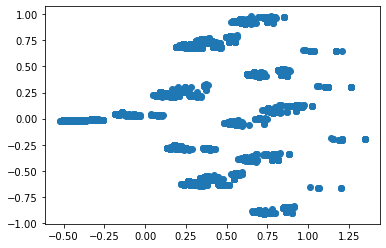

In [53]:
pca = PCA(n_components=2)

X_2d = pca.fit_transform(tags_df.values)
plt.scatter(X_2d[:,0], X_2d[:,1])

In [55]:
pca_feat_df = pd.DataFrame(X_2d, columns=["tags_pca_0", "tags_pca_1"])
pca_feat_df["question_id"] = qs["question_id"]
pca_feat_df.head()

,tags_pca_0,tags_pca_1,question_id
0,0.273486,0.709416,0
1,0.176971,-0.254628,1
2,0.303702,-0.605565,2
3,0.129849,0.245463,3
4,0.275138,0.711757,4


In [56]:
pca_feat_df.shape

(13523, 3)

In [47]:
qs[qs['tags2'] == '162']['part'].value_counts()

6    167
3     95
Name: part, dtype: int64

In [48]:
qs['tags6'].value_counts()

162    73
102    15
29      9
92      7
81      4
Name: tags6, dtype: int64

In [30]:
l1_df[l1_df['tags'] == '73']

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,bundle_id,correct_answer,part,tags,tags1,tags2,tags3,tags4,tags5,tags6,tag,type_of,l_type_of,small_quenstion,prior_question_elapsed_time_mean,ans_user_avg,elapsed_time_user_avg,explanation_user_avg,ans_content_avg,elapsed_time_content_avg,explanation_content_avg,lag_time_1,lag_time_2,lag_time_3,lag_incorrect_time,ans_tags1_avg,elapsed_time_tags1_avg,explanation_tags1_avg,ans_user_content_avg,ans_user_tags1_avg,ans_user_part_avg,lag_part_time_1,lag_part_time_2,lag_part_time_3,lag_part_incorrect_time,ans_user_content_count,ans_user_tags1_count,ans_user_part_count,days_elapsed,count,paid_user
246,8681,4472195841,44331,9532,0,105,1,0,40000.0,1,9532.0,3.0,5,73,73.0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,0.0,40000.0,0.550898,NaN,0.934132,NaN,NaN,NaN,130437.0,239992.0,309152.0,130437.0,NaN,NaN,NaN,NaN,NaN,0.647059,1.304370e+05,2.399920e+05,3.091520e+05,1.304370e+05,0,0,17,51,1,1
250,8685,4472501120,44331,8364,0,109,1,1,47000.0,1,8364.0,1.0,5,73,73.0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,0.0,47000.0,0.549708,NaN,0.935673,NaN,NaN,NaN,112738.0,201305.0,232215.0,112738.0,0.000000,40000.000000,1.000000,NaN,0.000000,0.619048,1.127380e+05,2.013050e+05,2.322150e+05,1.127380e+05,0,1,21,51,1,1
295,8730,4545715191,44331,9113,0,148,2,0,244000.0,1,9113.0,3.0,5,73,73.0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,0.0,244000.0,0.569444,NaN,0.949074,NaN,NaN,NaN,77203.0,6672988.0,6765811.0,6672988.0,0.500000,43500.000000,1.000000,NaN,0.500000,0.621622,7.720300e+04,6.672988e+06,6.765811e+06,6.672988e+06,0,2,37,52,1,1
298,8733,4545892252,44331,6314,0,151,3,1,18000.0,1,6314.0,3.0,5,73,73.0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,0.0,18000.0,0.566210,NaN,0.949772,NaN,NaN,NaN,58406.0,112971.0,177061.0,112971.0,0.333333,110333.335938,1.000000,NaN,0.333333,0.600000,5.840600e+04,1.129710e+05,1.770610e+05,1.129710e+05,0,3,40,52,1,1
303,8738,4553403389,44331,9839,0,156,2,0,17000.0,1,9839.0,1.0,5,73,73.0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,0.0,17000.0,0.562500,NaN,0.950893,NaN,NaN,NaN,7155949.0,7227364.0,7332148.0,7227364.0,0.500000,87250.000000,1.000000,NaN,0.500000,0.577778,7.155949e+06,7.227364e+06,7.332148e+06,7.227364e+06,0,4,45,52,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25731653,101224008,1254475404,2147375580,8572,0,73,2,1,22000.0,1,8572.0,2.0,5,73,73.0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,0.0,22000.0,0.712644,NaN,0.643678,0.224238,25563.552734,0.966299,119956.0,243938.0,288486.0,339871.0,0.585826,NaN,0.910287,NaN,0.333333,0.757576,1.199560e+05,2.439380e+05,2.884860e+05,3.398710e+05,0,3,33,14,1,0
25731669,101228422,85658,2147436122,9437,0,3,2,0,18000.0,0,9437.0,1.0,5,73,73.0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,0.0,18000.0,0.666667,NaN,0.000000,0.696356,26053.181641,0.918219,37602.0,58523.0,85658.0,85658.0,0.585827,NaN,0.910287,NaN,NaN,0.666667,3.760200e+04,5.852300e+04,8.565800e+04,8.565800e+04,0,0,3,0,1,0
25731777,101228736,757898,2147469944,6880,0,14,2,0,2000.0,0,6877.0,0.0,6,73,73.0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,3.0,2000.0,0.391304,NaN,0.000000,0.269886,27579.501953,0.171420,0.0,212052.0,307642.0,212052.0,0.585826,NaN,0.910286,NaN,NaN,1.000000,0.000000e+00,NaN,NaN,NaN,0,0,1,0,1,1
25731963,101228923,2348442156,2147469944,10080,0,86,3,0,13666.0,1,10078.0,1.0,6,73,73.0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,2.0,13666.0,0.770335,NaN,0.846890,0.811925,33451.617188,0.961067,168137.0,168137.0,168137.0,168137.0,0.585825,NaN,0.910284,NaN,0.000000,0.250000,2.347684e+09,2.347684e+09,2.347684e+09,2.347684e+09,0,1,4,27,1,1


In [27]:
l1_df['tags'].value_counts()

73                   770281
53                   668425
1                    573152
96                   508657
27                   465943
                      ...  
157 169 92               16
84 97 16 135 162         10
84 145 16 135 162        10
84 76 16 135 162         10
98 76 160 135 162         9
Name: tags, Length: 1519, dtype: int64

In [28]:
l1_df['tags1'].value_counts()

143.0    1641098
136.0    1351901
131.0    1140691
73.0      825277
74.0      759552
          ...   
19.0        2237
117.0       1302
86.0         644
160.0        414
38.0         215
Name: tags1, Length: 117, dtype: int64

In [21]:
l1_df['tags2'].isnull().sum()

12527182

In [24]:
l1_df['tags3'].unique()

array([ 81.,  92.,  29., 102.,  nan,  21., 119.,  56.,  38.,  32., 176.,
       163.,  30., 142., 100., 162.,  69., 107.,   6.,  87.,  35., 160.,
        62.,  88.,  41., 105., 117., 138., 141., 148.,  20., 186., 114.,
        71.,  18.,  97.,  76., 118.,  39., 146.,   3.,  46.,  16., 145.,
        50.,  42., 184., 185.,  77.,  59.,   0., 135.,  11., 154.])

In [25]:
l1_df['tags2'].unique()

array([ 93.,  94.,  10., 140.,  92., 162., 103.,  67.,  nan,  18.,  50.,
       118.,  19., 155.,  17.,  41., 100.,  56., 148.,  71., 143., 119.,
       114., 137.,  88.,  90.,   5.,  40., 110., 104., 164.,  70., 187.,
       105.,  20., 142., 107., 178.,  68.,  99., 163.,  38.,  81., 141.,
         2., 150.,  83., 130., 131.,  13.,  12., 149., 101.,  36., 144.,
       171., 183., 176.,  30.,  32., 185., 145.,  97.,  39.,  42., 138.,
        62.,  69., 111.,  76., 117., 169., 120., 102., 126.,  84.,   0.,
        29., 184.,  16., 153.,  37., 158., 160., 139.,  77.,  35.])

In [8]:

l1_df['count'] = 1
user_day_count = l1_df[l1_df['days_elapsed'] >= 1].groupby(['user_id','days_elapsed'])['count'].agg(['count'])
user_day_count = user_day_count.reset_index()
# 50にしておく
paid_user = user_day_count[user_day_count['count'] > 50]['user_id'].unique()

l1_df['paid_user'] = 0
l1_df.loc[l1_df['user_id'].isin(paid_user),'paid_user'] = 1

In [11]:
l1_df[l1_df['paid_user'] == 1]['user_id'].value_counts()

1047202059    16169
448193529     15164
690000616     14975
1796531206    14362
328913709     13682
              ...  
2044849273       56
1868479036       55
1660531095       55
915467896        55
706924161        54
Name: user_id, Length: 22205, dtype: int64

In [14]:
l1_df[l1_df['user_id'] == 1047202059]['answered_correctly'].mean()

0.8061104582843713

In [9]:
l1_df[['answered_correctly','paid_user','part']].groupby(['paid_user','part']).mean()

answered_correctly
paid_user part                    
0         1               0.652042
          2               0.690954
          3               0.553554
          4               0.405831
          5               0.562931
          6               0.563164
          7               0.498283
1         1               0.771254
          2               0.714904
          3               0.717280
          4               0.681228
          5               0.627833
          6               0.683847
          7               0.693141

In [15]:
l1_df[['answered_correctly','paid_user','part']].groupby(['paid_user','part']).agg(['mean']).reset_index()

,paid_user,part,answered_correctly
,,,mean
0,0,1,0.652042
1,0,2,0.690954
2,0,3,0.553554
3,0,4,0.405831
4,0,5,0.562931
5,0,6,0.563164
6,0,7,0.498283
7,1,1,0.771254
8,1,2,0.714904


In [11]:
l1_df[l1_df['paid_user'] == 1]['user_id'].nunique()

22205

In [12]:
l1_df[l1_df['paid_user'] == 0]['user_id'].nunique()

100062

In [9]:
l1_df['paid_user'].value_counts()

1    19174914
0     6557113
Name: paid_user, dtype: int64

In [20]:
l1_df = pd.concat([b_df,l1_df],axis=1)

In [26]:
l1_df[['user_id','part','timestamp','lag_time_1','lag_part_time_1','lag_part_time_2','lag_part_time_3','lag_incorrect_time','lag_part_incorrect_time']]

,user_id,part,timestamp,lag_time_1,lag_part_time_1,lag_part_time_2,lag_part_time_3,lag_incorrect_time,lag_part_incorrect_time
0,124,1,0,NaN,NaN,NaN,NaN,NaN,NaN
1,124,1,32683,32683.0,32683.0,NaN,NaN,NaN,NaN
2,124,1,62000,29317.0,29317.0,62000.0,NaN,29317.0,29317.0
3,124,2,83632,21632.0,NaN,NaN,NaN,50949.0,NaN
4,124,3,189483,105851.0,NaN,NaN,NaN,105851.0,NaN
...,...,...,...,...,...,...,...,...,...
25732022,2147469944,5,2515572144,54078.0,54078.0,103296.0,121427.0,179864.0,179864.0
25732023,2147469944,5,2515647508,75364.0,75364.0,129442.0,178660.0,255228.0,255228.0
25732024,2147469944,5,2515723695,76187.0,76187.0,151551.0,205629.0,76187.0,76187.0
25732025,2147469944,5,2516020571,296876.0,296876.0,373063.0,448427.0,296876.0,296876.0


In [23]:
l1_df[['ans_user_content_count']]

,ans_user_content_count
0,0
1,0
2,0
3,0
4,0
...,...
25732022,0
25732023,0
25732024,0
25732025,1


In [17]:
l1_df[['user_id','content_id','tags1','part','answered_correctly','ans_user_tags1_avg']][(l1_df['user_id'] == 2147469944)]

,user_id,content_id,tags1,part,answered_correctly,ans_user_tags1_avg
25731754,2147469944,7900,131.0,1,1,NaN
25731755,2147469944,7876,10.0,1,0,NaN
25731756,2147469944,175,9.0,1,1,NaN
25731757,2147469944,1278,143.0,2,0,NaN
25731758,2147469944,2065,136.0,3,1,NaN
...,...,...,...,...,...,...
25732022,2147469944,5393,133.0,5,1,0.0
25732023,2147469944,5524,91.0,5,0,NaN
25732024,2147469944,5335,58.0,5,0,0.0
25732025,2147469944,6185,58.0,5,0,0.0


In [9]:
l1_df.shape

(25732027, 19)

In [10]:
l2_df.shape

(25732027, 19)

In [25]:
LOOP1 = ['ans_user_avg','elapsed_time_user_avg','explanation_user_avg',
        'ans_content_avg','elapsed_time_content_avg','explanation_content_avg',
        'ans_user_content_count',
        'lag_time_1','lag_time_2','lag_time_3','lag_incorrect_time',
        'ans_tags1_avg','elapsed_time_tags1_avg','explanation_tags1_avg',
        'ans_user_tags1_count','ans_user_content_avg',
        'ans_user_part_count','ans_user_part_avg',
        'ans_user_tags1_avg']

In [26]:
LOOP2 = ['answered_correctly_user_avg','elapsed_time_user_avg','explanation_user_avg',\
        'answered_correctly_q_avg','elapsed_time_q_avg','explanation_q_avg',\
        'answered_correctly_uq_count','timestamp_u_recency_1','timestamp_u_recency_2',\
        'timestamp_u_recency_3','timestamp_u_incorrect_recency',\
        'answered_correctly_tags1_avg','elapsed_time_tags1_avg','explanation_tags1_avg',
        'answered_correctly_ut_count','answered_correctly_uq_avg',\
        'answered_correctly_up_count','answered_correctly_up_avg',\
        'answered_correctly_ut_avg']


In [27]:
l2_df['answered_correctly_tags1_avg'].isnull().sum()

19537801

In [3]:
for col in l1_df.columns:
    print(f'{col} : {l1_df[col].mean()}')

ans_user_avg : 0.655110239982605
elapsed_time_user_avg : 27824.826171875
explanation_user_avg : 0.655110239982605
ans_content_avg : 0.6523401737213135
elapsed_time_content_avg : 28008.626953125
explanation_content_avg : 0.6523401737213135
lag_time_1 : 11648230.0
lag_time_2 : 22805960.0
lag_time_3 : 33728940.0
lag_incorrect_time : 32878464.0
ans_tags1_avg : 0.6520004868507385
elapsed_time_tags1_avg : 28360.203125
explanation_tags1_avg : 0.6520004868507385
ans_user_content_avg : 0.6909342408180237
ans_user_tags1_avg : 0.0
ans_user_part_avg : 0.0
ans_user_content_count : 0.1509123630252681
ans_user_tags1_count : 29.36979368162485
ans_user_part_count : 266.3545656935616


In [28]:
for i in range(len(LOOP1)):
    if not (l1_df[LOOP1[i]].mean() == l2_df[LOOP2[i]].mean()):
        print(LOOP1[i],LOOP2[i])
        print(f'L1:{l1_df[LOOP1[i]].mean()} L2:{l2_df[LOOP2[i]].mean()}')
        print()

ans_tags1_avg answered_correctly_tags1_avg
L1:0.6520004868507385 L2:28360.34375

elapsed_time_tags1_avg elapsed_time_tags1_avg
L1:28360.203125 L2:28360.34375

ans_user_tags1_count answered_correctly_ut_count
L1:29.36979368162485 L2:0.0

ans_user_content_avg answered_correctly_uq_avg
L1:0.6909342408180237 L2:0.33690938353538513

ans_user_part_avg answered_correctly_up_avg
L1:0.0 L2:0.6665233969688416

ans_user_tags1_avg answered_correctly_ut_avg
L1:0.0 L2:27.443313598632812



In [23]:
l1_df['ans_user_part_avg'].value_counts()

0.0    25732027
Name: ans_user_part_avg, dtype: int64

In [30]:
l1_df = pd.concat([b_df,l1_df],axis=1)
l2_df = pd.concat([b_df,l2_df],axis=1)

In [42]:
l1_df[['user_id','content_id','ans_user_content_avg','answered_correctly']][l1_df['user_id'] == 124]

,user_id,content_id,ans_user_content_avg,answered_correctly
0,124,7900,NaN,1
1,124,7876,NaN,0
2,124,175,NaN,1
3,124,1278,NaN,0
4,124,2064,NaN,0
5,124,2063,NaN,0
6,124,2065,0.000000,1
7,124,3364,0.500000,0
8,124,3365,0.333333,0
9,124,3363,NaN,0


In [40]:
l2_df[['user_id','content_id','answered_correctly_uq_avg','answered_correctly']][l1_df['user_id'] == 124]['content_id'].value_counts()

6911    1
6910    1
2946    1
2947    1
7876    1
4492    1
2063    1
2064    1
2065    1
2948    1
4696    1
4120    1
7900    1
6173    1
3363    1
2593    1
6370    1
2595    1
3364    1
3365    1
1278    1
175     1
7216    1
7217    1
7218    1
7219    1
2594    1
6908    1
6909    1
6116    1
Name: content_id, dtype: int64

In [14]:
create_lists = [['d',
                'ans_user_count','ans_user_sum','elapsed_time_user_sum','explanation_user_sum',
                'ans_user_avg','elapsed_time_user_avg','explanation_user_avg'],
                ['c',
                'ans_content_count','ans_content_sum','elapsed_time_content_sum','explanation_content_sum',
                'ans_content_avg','elapsed_time_content_avg','explanation_content_avg'],
                ['t',
                'ans_tags1_count','ans_tags1_sum','elapsed_time_tags1_sum','explanation_tags1_sum'
                'ans_tags1_avg','elapsed_time_tags1_avg','explanation_tags1_avg']
                ]
for l in create_lists:
    l

In [15]:
l

['t',
 'ans_tags1_count',
 'ans_tags1_sum',
 'elapsed_time_tags1_sum',
 'explanation_tags1_sumans_tags1_avg',
 'elapsed_time_tags1_avg',
 'explanation_tags1_avg']

In [7]:
n = np.zeros(len(df), dtype = np.float32)

In [16]:
l = ['a','b','c','d']
for ll in l:
    d[ll] = np.zeros(len(df), dtype = np.float32)

In [22]:
d.values()

dict_values([array([100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [23]:
df = pd.DataFrame(d.values(),index=d.keys()).T

In [24]:
df

,n,a,b,c,d
0,100.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
99,0.0,0.0,0.0,0.0,0.0
100,0.0,0.0,0.0,0.0,0.0
101,0.0,0.0,0.0,0.0,0.0
102,0.0,0.0,0.0,0.0,0.0


In [26]:
pd.DataFrame(d)

,n,a,b,c,d
0,100.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
99,0.0,0.0,0.0,0.0,0.0
100,0.0,0.0,0.0,0.0,0.0
101,0.0,0.0,0.0,0.0,0.0
102,0.0,0.0,0.0,0.0,0.0


In [27]:
d

{'n': array([100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.], dtype=float32),
 'a': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0

In [10]:
d['n']

array([100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.], dtype=float32)

In [5]:
df = pd.read_csv('../data/input/example_test.csv')

In [6]:
df

,row_id,group_num,timestamp,user_id,content_id,content_type_id,task_container_id,prior_question_elapsed_time,prior_question_had_explanation,prior_group_answers_correct,prior_group_responses
0,0,0,0,275030867,5729,0,0,NaN,NaN,[],[]
1,1,0,13309898705,554169193,12010,0,4427,19000.0,True,NaN,NaN
2,2,0,4213672059,1720860329,457,0,240,17000.0,True,NaN,NaN
3,3,0,62798072960,288641214,13262,0,266,23000.0,True,NaN,NaN
4,4,0,10585422061,1728340777,6119,0,162,72400.0,True,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
99,104,3,13167339284,1900527744,3004,0,1179,24667.0,True,NaN,NaN
100,105,3,13167339284,1900527744,3003,0,1179,24667.0,True,NaN,NaN
101,106,3,64497673060,7792299,7908,0,676,19000.0,True,NaN,NaN
102,107,3,62798166743,288641214,9077,0,269,25000.0,True,NaN,NaN


In [9]:
str(np.nan)

'nan'

In [10]:
train = pd.read_feather('../features/mini_data/BASE_train.feather')

In [16]:
train["attempt_no"] = 1
train.attempt_no=train.attempt_no.astype('int8')
#
attempt_no_agg=train[["attempt_no",'user_id','content_id']].groupby(["user_id","content_id"]).agg(['sum']).astype('int8')
#attempt_no_agg=attempt_no_agg.astype('int8')


train["attempt_no"] = train[["user_id","content_id",'attempt_no']].groupby(["user_id","content_id"])["attempt_no"].cumsum()

In [18]:
train

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,bundle_id,correct_answer,part,tags,tags1,tags2,tags3,tags4,tags5,tags6,tag,type_of,l_type_of,small_quenstion,prior_question_elapsed_time_mean,attempt_no
0,46,0,124,7900,0,0,0,1,NaN,0,7900.0,0.0,1,131 93 81,131.0,93.0,81.0,NaN,NaN,NaN,NaN,None,NaN,0.0,25435.43928,1
1,47,32683,124,7876,0,1,0,0,26000.0,0,7876.0,3.0,1,10 94 92,10.0,94.0,92.0,NaN,NaN,NaN,NaN,None,NaN,0.0,26000.00000,1
2,48,62000,124,175,0,2,2,1,29000.0,0,175.0,2.0,1,9 10 92,9.0,10.0,92.0,NaN,NaN,NaN,NaN,None,NaN,0.0,29000.00000,1
3,49,83632,124,1278,0,3,1,0,26000.0,0,1278.0,3.0,2,143 140 81 29,143.0,140.0,81.0,29.0,NaN,NaN,NaN,None,NaN,0.0,26000.00000,1
4,50,189483,124,2064,0,4,2,0,18000.0,0,2063.0,1.0,3,157 92 29,157.0,92.0,29.0,NaN,NaN,NaN,NaN,None,NaN,1.0,18000.00000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40442776,101228983,2515572144,2147469944,5393,0,177,0,1,36000.0,1,5393.0,0.0,5,133,133.0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,0.0,36000.00000,1
40442777,101228984,2515647508,2147469944,5524,0,178,0,0,26000.0,1,5524.0,1.0,5,91,91.0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,0.0,26000.00000,1
40442778,101228985,2515723695,2147469944,5335,0,179,3,0,44000.0,1,5335.0,2.0,5,58,58.0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,0.0,44000.00000,1
40442779,101228987,2516020571,2147469944,6185,0,181,0,0,39000.0,1,6185.0,3.0,5,58,58.0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,0.0,39000.00000,2


In [20]:
train['user_answer']

0    11488077
1    10994880
3    10615675
2     7344149
Name: user_answer, dtype: int64

In [22]:
train.groupby(['user_id','user_answer']).cumcount()

0            0
1            1
2            0
3            0
4            1
            ..
40442776    80
40442777    81
40442778    78
40442779    82
40442780    83
Length: 40442781, dtype: int64

In [15]:
attempt_no_agg

attempt_no
                             sum
user_id    content_id           
124        175                 1
           1278                1
           2063                1
           2064                1
           2065                1
...                          ...
2147469944 10690               1
           10691               1
           10698               1
           10699               1
           10700               1

[35710205 rows x 1 columns]

In [5]:
train['tags1'].value_counts()

143.0    2599635
136.0    2099193
131.0    1759379
73.0     1319652
53.0     1204948
          ...   
19.0        3630
117.0       2110
86.0        1055
160.0        664
38.0         300
Name: tags1, Length: 117, dtype: int64

In [42]:
TARGET = 'answered_correctly'

In [2]:
valid = pd.read_feather('../data/oof/034_simple_lgb.feather')

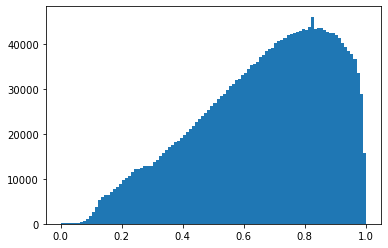

In [6]:
plt.hist(valid['pred'],bins=100)
plt.show()

In [11]:
valid

,row_id,pred
0,1874,0.822978
1,1875,0.300015
2,1876,0.359283
3,1877,0.631950
4,1878,0.329863
...,...,...
2451416,101197601,0.791046
2451417,101197602,0.596080
2451418,101197603,0.385574
2451419,101197604,0.450036


In [30]:
valid_ans = pd.read_feather('../features/mini_data/BASE_valid.feather')

In [ ]:
t = pd.read_feather('../features/mini_data/BASE_valid.feather')

In [33]:
valid_ans['prior_question_had_explanation'].value_counts()

1    2236120
0     215301
Name: prior_question_had_explanation, dtype: int64

In [47]:
task_usr = valid_ans[[TARGET,'task_container_id','user_id']].groupby(['user_id','task_container_id']).agg(['mean','count']).reset_index()

In [49]:
task_usr.columns = ['user_id','task_container_id','mean','count']

In [53]:
task_usr[task_usr['count'] == 1]['mean'].mean()

0.6578801430426858

In [60]:
task_usr[task_usr['count'] >= 3]['mean'].mean()

0.6740875007882983

In [63]:
valid_ans[(valid_ans['user_id'] == 24418) & (valid_ans['task_container_id'] == 5)]

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,bundle_id,correct_answer,part,tags,tags1,tags2,tags3,tags4,tags5,tags6,tag,type_of,l_type_of,small_quenstion,prior_question_elapsed_time_mean
7,1881,100241,24418,3363,0,5,0,0,4000.0,0,3363.0,3.0,4,74 103 29,74.0,103.0,29.0,NaN,NaN,NaN,NaN,None,NaN,0.0,4000.0
8,1882,100241,24418,3365,0,5,2,1,4000.0,0,3363.0,2.0,4,136 103 29,136.0,103.0,29.0,NaN,NaN,NaN,NaN,None,NaN,2.0,4000.0
9,1883,100241,24418,3364,0,5,1,1,4000.0,0,3363.0,1.0,4,136 103 29,136.0,103.0,29.0,NaN,NaN,NaN,NaN,None,NaN,1.0,4000.0


In [1]:
valid_ans['tags1'].value_counts()

NameError: name 'valid_ans' is not defined

In [67]:
valid_ans['count'] = 1
task_count = valid_ans[['count','task_container_id','user_id']].groupby(['user_id','task_container_id']).agg(['count']).reset_index()

In [86]:
task_count.columns = ['user_id','task_container_id','task_container_count']

In [87]:
valid_ans = pd.merge(valid_ans,task_count,on=['user_id','task_container_id'],how='left')

In [90]:
valid_ans[[TARGET,'task_container_count']].groupby('task_container_count').mean()

,answered_correctly
task_container_count,
1,0.657880
2,0.796368
3,0.675542
4,0.667371
5,0.692359


In [92]:
valid_ans['task_container_id'].value_counts()

14      17605
15      17505
4       15127
5       15073
6       15062
        ...  
9079        1
8925        1
9072        1
9321        1
8957        1
Name: task_container_id, Length: 9859, dtype: int64

In [93]:
dd = pd.read_feather('../features/kernel_mini_data/GROUP_BY_train.feather')

In [94]:
dd

,task_container_count
0,1
1,1
2,1
3,1
4,3
...,...
25732022,1
25732023,1
25732024,1
25732025,1


In [17]:
valid_ans = pd.merge(valid_ans,valid,on='row_id',how='left')

In [22]:
valid_ans['diff'] = valid_ans[TARGET] - valid_ans['pred']

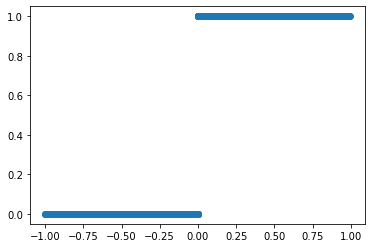

In [23]:
plt.scatter(valid_ans['diff'],valid_ans[TARGET])
plt.show()

In [27]:
valid_ans[valid_ans['diff'] < -0.9]['part'].value_counts()

5    4481
2    3855
6    2431
3    2413
1    2284
4    1776
7    1149
Name: part, dtype: int64

In [29]:
valid_ans[valid_ans['diff'] > 0.9]['part'].value_counts()

5    128
7     72
6     40
4     38
2     27
3     21
1      8
Name: part, dtype: int64

In [28]:
valid_ans['part'].value_counts()

5    1017825
2     462805
6     256191
3     215430
4     196022
1     180071
7     123077
Name: part, dtype: int64

In [25]:
valid_ans.sort_values('diff')

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,bundle_id,correct_answer,part,tags,tags1,tags2,tags3,tags4,tags5,tags6,tag,type_of,l_type_of,small_quenstion,prior_question_elapsed_time_mean,pred,diff
2091628,87331204,33094223612,1858014392,7946,0,2027,1,0,20000.0,1,7946.0,2.0,1,131 149 81,131.0,149.0,81.0,NaN,NaN,NaN,NaN,None,NaN,0.0,20000.0,0.998477,-0.998477
944910,40161432,17289136417,854518136,10574,0,3086,3,0,19000.0,1,10574.0,0.0,1,131 68 92,131.0,68.0,92.0,NaN,NaN,NaN,NaN,None,NaN,0.0,19000.0,0.998109,-0.998109
584762,25102539,17603555210,536909391,10477,0,2089,2,0,25000.0,1,10477.0,0.0,1,131 149 29,131.0,149.0,29.0,NaN,NaN,NaN,NaN,None,NaN,0.0,25000.0,0.997150,-0.997150
1699915,71409670,15365252108,1519230159,742,0,2325,3,0,15000.0,1,742.0,0.0,2,143 176 38 81,143.0,176.0,38.0,81.0,NaN,NaN,NaN,None,NaN,0.0,15000.0,0.996933,-0.996933
1294908,54328659,117243979,1151429516,7963,0,69,1,0,16000.0,1,7963.0,2.0,1,131 93 38,131.0,93.0,38.0,NaN,NaN,NaN,NaN,None,NaN,0.0,16000.0,0.996889,-0.996889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2418252,99875615,2757676001,2120015219,7979,0,654,0,1,3000.0,1,7979.0,0.0,1,51 131 162 38,51.0,131.0,162.0,38.0,NaN,NaN,NaN,None,NaN,0.0,3000.0,0.024570,0.975430
2390825,98781249,6490284033,2095348710,541,0,189,3,1,17000.0,1,541.0,3.0,2,62 90 142 81 29,62.0,90.0,142.0,81.0,29.0,NaN,NaN,None,NaN,0.0,17000.0,0.013974,0.986026
1764812,74416253,16942902992,1583784120,482,0,890,3,1,8000.0,1,482.0,3.0,2,143 20 81 29,143.0,20.0,81.0,29.0,NaN,NaN,NaN,None,NaN,0.0,8000.0,0.011093,0.988907
1679725,70356743,16954162826,1496456383,1246,0,1173,3,1,16000.0,1,1246.0,3.0,2,2 32 92 29,2.0,32.0,92.0,29.0,NaN,NaN,NaN,None,NaN,0.0,16000.0,0.009558,0.990442


In [41]:
with open('../features/kernel_data/loop_feats_mini.dill','rb') as f:
    dd = dill.load(f)

In [43]:
next(iter(dd['answered_correctly_uq']))

124

In [48]:
# dd['answered_correctly_uq'][124]

In [46]:
# dd['answered_correctly_uq'][124]

In [49]:
# dd[124.0]

In [20]:
for v in dd:
    v

In [36]:
ddd = defaultdict(lambda: defaultdict(int))

In [37]:
ddd[0][0] = [0,0]
ddd[1.0][1.01] = [3,0]

In [38]:
ddd

defaultdict(<function __main__.<lambda>()>,
            {0: defaultdict(int, {0: [0, 0]}),
             1.0: defaultdict(int, {1.01: [3, 0]})})

In [23]:
v[2147362683.0]

IndexError: invalid index to scalar variable.

In [18]:
# for i in range(1,40):
#     print(i)

#     df = pd.read_feather(f'../data/train_valid/cv{i}_train.feather')
#     print(df.shape)

1
(98730332, 1)
2
(96230332, 1)
3
(93730332, 1)
4
(91230332, 1)
5
(88730332, 1)
6
(86230332, 1)
7
(83730332, 1)
8
(81230332, 1)
9
(78730332, 1)
10
(76230332, 1)
11
(73730332, 1)
12
(71230332, 1)
13
(68730332, 1)
14
(66230332, 1)
15
(63730332, 1)
16
(61230332, 1)
17
(58730332, 1)
18
(56230332, 1)
19
(53730332, 1)
20
(51230332, 1)
21
(48730332, 1)
22
(46230332, 1)
23
(43730332, 1)
24
(41230332, 1)
25
(38730332, 1)
26
(36230332, 1)
27
(33730332, 1)
28
(31230332, 1)
29
(28730332, 1)
30
(26230332, 1)
31
(23730332, 1)
32
(21230332, 1)
33
(18730332, 1)
34
(16230332, 1)
35
(13730332, 1)
36
(11230332, 1)
37
(8730332, 1)
38
(6230332, 1)
39
(3730332, 1)


In [10]:
answered_correctly_uq_dic[0][1] = 1
answered_correctly_uq_dic[0][2] = 2

In [11]:
answered_correctly_uq_dic

defaultdict(<function __main__.<lambda>()>,
            {0: defaultdict(int, {1: 1, 2: 2})})

In [2]:
a = defaultdict(int)

a['bb'] = 1
a['cc'] = 2

In [3]:
a.keys()

dict_keys(['bb', 'cc'])

In [2]:
for i in range(1,41):
    print(f'{i}')
    df = pd.read_feather(f'../data/train_valid/cv{i}_train.feather')
    print(df.shape)

1
(98730332, 1)
2
(96230332, 1)
3
(93730332, 1)
4
(91230332, 1)
5
(88730332, 1)
6
(86230332, 1)
7
(83730332, 1)
8
(81230332, 1)
9
(78730332, 1)
10
(76230332, 1)
11
(73730332, 1)
12
(71230332, 1)
13
(68730332, 1)
14
(66230332, 1)
15
(63730332, 1)
16
(61230332, 1)
17
(58730332, 1)
18
(56230332, 1)
19
(53730332, 1)
20
(51230332, 1)
21
(48730332, 1)
22
(46230332, 1)
23
(43730332, 1)
24
(41230332, 1)
25
(38730332, 1)
26
(36230332, 1)
27
(33730332, 1)
28
(31230332, 1)
29
(28730332, 1)
30
(26230332, 1)
31
(23730332, 1)
32
(21230332, 1)
33
(18730332, 1)
34
(16230332, 1)
35
(13730332, 1)
36
(11230332, 1)
37
(8730332, 1)
38
(6230332, 1)
39
(3730332, 1)
40
(1230332, 1)


In [36]:
df = pd.read_feather('../features/mini_data/BASE_train.feather')

In [37]:
df.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,bundle_id,correct_answer,part,tags,tags1,tags2,tags3,tags4,tags5,tags6,tag,type_of,l_type_of,small_quenstion,prior_question_elapsed_time_mean
0,8511,0,44331,5542,0,0,1,0,NaN,0,5542.0,3.0,5,96,96.0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,0.0,25295.100054
1,8512,35028,44331,5697,0,1,2,0,44000.0,0,5697.0,0.0,5,14,14.0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,0.0,44000.000000
2,8513,61706,44331,5748,0,2,3,1,32000.0,0,5748.0,3.0,5,8,8.0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,0.0,32000.000000
3,8514,85685,44331,376,0,3,0,0,24000.0,0,376.0,1.0,2,62 90 100 38 102,62.0,90.0,100.0,38.0,102.0,NaN,NaN,None,NaN,0.0,24000.000000
4,8515,141228,44331,5597,0,4,3,1,21000.0,0,5597.0,3.0,5,64,64.0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,0.0,21000.000000


In [24]:
answered_correctly_u_count = defaultdict(int)
answered_correctly_u_sum = defaultdict(int)
elapsed_time_u_sum = defaultdict(int)
explanation_u_sum = defaultdict(int)
timestamp_u = defaultdict(list)
timestamp_u_incorrect = defaultdict(list)

# Question dictionaries
answered_correctly_q_count = defaultdict(int)
answered_correctly_q_sum = defaultdict(int)
elapsed_time_q_sum = defaultdict(int)
explanation_q_sum = defaultdict(int)

# Client Question dictionary
answered_correctly_uq = defaultdict(lambda: defaultdict(int))

In [27]:
answered_correctly_u_avg = np.zeros(len(df), dtype = np.float32)
elapsed_time_u_avg = np.zeros(len(df), dtype = np.float32)
explanation_u_avg = np.zeros(len(df), dtype = np.float32)
timestamp_u_recency_1 = np.zeros(len(df), dtype = np.float32)
timestamp_u_recency_2 = np.zeros(len(df), dtype = np.float32)
timestamp_u_recency_3 = np.zeros(len(df), dtype = np.float32)
timestamp_u_incorrect_recency = np.zeros(len(df), dtype = np.float32)
# -----------------------------------------------------------------------
# Question features
answered_correctly_q_avg = np.zeros(len(df), dtype = np.float32)
elapsed_time_q_avg = np.zeros(len(df), dtype = np.float32)
explanation_q_avg = np.zeros(len(df), dtype = np.float32)
# -----------------------------------------------------------------------
# User Question
answered_correctly_uq_count = np.zeros(len(df), dtype = np.int32)
# -----------------------------------------------------------------------

for num, row in tqdm(enumerate(df[['user_id', 'answered_correctly', 'content_id', 'prior_question_elapsed_time', 'prior_question_had_explanation', 'timestamp']].values)):

    # Client features assignation
    # ------------------------------------------------------------------
    if answered_correctly_u_count[row[0]] != 0:
        answered_correctly_u_avg[num] = answered_correctly_u_sum[row[0]] / answered_correctly_u_count[row[0]]
        elapsed_time_u_avg[num] = elapsed_time_u_sum[row[0]] / answered_correctly_u_count[row[0]]
        explanation_u_avg[num] = explanation_u_sum[row[0]] / answered_correctly_u_count[row[0]]
    else:
        answered_correctly_u_avg[num] = np.nan
        elapsed_time_u_avg[num] = np.nan
        explanation_u_avg[num] = np.nan

    if len(timestamp_u[row[0]]) == 0:
        timestamp_u_recency_1[num] = np.nan
        timestamp_u_recency_2[num] = np.nan
        timestamp_u_recency_3[num] = np.nan
    elif len(timestamp_u[row[0]]) == 1:
        timestamp_u_recency_1[num] = row[5] - timestamp_u[row[0]][0]
        timestamp_u_recency_2[num] = np.nan
        timestamp_u_recency_3[num] = np.nan
    elif len(timestamp_u[row[0]]) == 2:
        timestamp_u_recency_1[num] = row[5] - timestamp_u[row[0]][1]
        timestamp_u_recency_2[num] = row[5] - timestamp_u[row[0]][0]
        timestamp_u_recency_3[num] = np.nan
    elif len(timestamp_u[row[0]]) == 3:
        timestamp_u_recency_1[num] = row[5] - timestamp_u[row[0]][2]
        timestamp_u_recency_2[num] = row[5] - timestamp_u[row[0]][1]
        timestamp_u_recency_3[num] = row[5] - timestamp_u[row[0]][0]

    if len(timestamp_u_incorrect[row[0]]) == 0:
        timestamp_u_incorrect_recency[num] = np.nan
    else:
        timestamp_u_incorrect_recency[num] = row[5] - timestamp_u_incorrect[row[0]][0]

    # ------------------------------------------------------------------
    # Question features assignation
    if answered_correctly_q_count[row[2]] != 0:
        answered_correctly_q_avg[num] = answered_correctly_q_sum[row[2]] / answered_correctly_q_count[row[2]]
        elapsed_time_q_avg[num] = elapsed_time_q_sum[row[2]] / answered_correctly_q_count[row[2]]
        explanation_q_avg[num] = explanation_q_sum[row[2]] / answered_correctly_q_count[row[2]]
    else:
        answered_correctly_q_avg[num] = np.nan
        elapsed_time_q_avg[num] = np.nan
        explanation_q_avg[num] = np.nan
    # ------------------------------------------------------------------
    # Client Question assignation
    answered_correctly_uq_count[num] = answered_correctly_uq[row[0]][row[2]]
    # ------------------------------------------------------------------
    # ------------------------------------------------------------------
    # Client features updates
    answered_correctly_u_count[row[0]] += 1
    elapsed_time_u_sum[row[0]] += row[3]
    explanation_u_sum[row[0]] += int(row[4])
    if len(timestamp_u[row[0]]) == 3:
        timestamp_u[row[0]].pop(0)
        timestamp_u[row[0]].append(row[5])
    else:
        timestamp_u[row[0]].append(row[5])
    # ------------------------------------------------------------------
    # Question features updates
    answered_correctly_q_count[row[2]] += 1
    elapsed_time_q_sum[row[2]] += row[3]
    explanation_q_sum[row[2]] += int(row[4])
    # ------------------------------------------------------------------
    # Client Question updates
    answered_correctly_uq[row[0]][row[2]] += 1
    # ------------------------------------------------------------------
    # Flag for training and inference
    if True:
        # ------------------------------------------------------------------
        # Client features updates
        answered_correctly_u_sum[row[0]] += row[1]
        if row[1] == 0:
            if len(timestamp_u_incorrect[row[0]]) == 1:
                timestamp_u_incorrect[row[0]].pop(0)
                timestamp_u_incorrect[row[0]].append(row[5])
            else:
                timestamp_u_incorrect[row[0]].append(row[5])

        # ------------------------------------------------------------------
        # Question features updates
        answered_correctly_q_sum[row[2]] += row[1]
        # ------------------------------------------------------------------


user_df = pd.DataFrame({'answered_correctly_u_avg': answered_correctly_u_avg, 'elapsed_time_u_avg': elapsed_time_u_avg, 'explanation_u_avg': explanation_u_avg, 
                        'answered_correctly_q_avg': answered_correctly_q_avg, 'elapsed_time_q_avg': elapsed_time_q_avg, 'explanation_q_avg': explanation_q_avg, 
                        'answered_correctly_uq_count': answered_correctly_uq_count, 'timestamp_u_recency_1': timestamp_u_recency_1, 'timestamp_u_recency_2': timestamp_u_recency_2,
                        'timestamp_u_recency_3': timestamp_u_recency_3, 'timestamp_u_incorrect_recency': timestamp_u_incorrect_recency})

df = pd.concat([df, user_df], axis = 1)

8568610it [02:10, 65731.72it/s]


In [33]:
# answered_correctly_q_sum

In [28]:
df

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,bundle_id,correct_answer,part,tags,tags1,tags2,tags3,tags4,tags5,tags6,tag,type_of,l_type_of,small_quenstion,prior_question_elapsed_time_mean,answered_correctly_u_avg,elapsed_time_u_avg,explanation_u_avg,answered_correctly_q_avg,elapsed_time_q_avg,explanation_q_avg,answered_correctly_uq_count,timestamp_u_recency_1,timestamp_u_recency_2,timestamp_u_recency_3,timestamp_u_incorrect_recency
0,8511,0,44331,5542,0,0,1,0,NaN,0,5542.0,3.0,5,96,96.0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,0.0,25295.100054,0.585616,NaN,0.958904,0.714286,NaN,0.642857,2,-4.661118e+09,-4.661118e+09,-4.661118e+09,-4.660926e+09
1,8512,35028,44331,5697,0,1,2,0,44000.0,0,5697.0,0.0,5,14,14.0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,0.0,44000.000000,0.583618,NaN,0.955631,0.425000,30365.000000,0.900000,1,3.502800e+04,-4.661083e+09,-4.661083e+09,3.502800e+04
2,8513,61706,44331,5748,0,2,3,1,32000.0,0,5748.0,3.0,5,8,8.0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,0.0,32000.000000,0.581633,NaN,0.952381,0.733333,25700.000000,0.333333,1,2.667800e+04,6.170600e+04,-4.661057e+09,2.667800e+04
3,8514,85685,44331,376,0,3,0,0,24000.0,0,376.0,1.0,2,62 90 100 38 102,62.0,90.0,100.0,38.0,102.0,NaN,NaN,None,NaN,0.0,24000.000000,0.583051,NaN,0.949153,0.697987,22033.556641,0.214765,1,2.397900e+04,5.065700e+04,8.568500e+04,5.065700e+04
4,8515,141228,44331,5597,0,4,3,1,21000.0,0,5597.0,3.0,5,64,64.0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,0.0,21000.000000,0.581081,NaN,0.945946,0.804878,26417.683594,0.939024,2,5.554300e+04,7.952200e+04,1.062000e+05,5.554300e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8568605,101228658,219919,2147463192,6318,0,12,3,0,9000.0,1,6318.0,0.0,5,124,124.0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,0.0,9000.000000,0.666667,NaN,0.333333,0.599515,NaN,0.908453,0,1.550200e+04,3.232100e+04,5.276300e+04,1.578220e+05
8568606,101228659,233275,2147463192,4756,0,13,0,0,6000.0,1,4756.0,2.0,5,96,96.0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,0.0,6000.000000,0.615385,NaN,0.384615,0.724382,NaN,0.727915,0,1.335600e+04,2.885800e+04,4.567700e+04,1.335600e+04
8568607,101228660,253051,2147463192,9376,0,14,0,0,5000.0,1,9376.0,2.0,5,96,96.0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,0.0,5000.000000,0.571429,NaN,0.428571,0.859195,24649.902344,0.991379,0,1.977600e+04,3.313200e+04,4.863400e+04,1.977600e+04
8568608,101228661,272506,2147463192,4447,0,15,1,1,10000.0,1,4447.0,1.0,5,47,47.0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,0.0,10000.000000,0.533333,NaN,0.466667,0.707341,NaN,0.979717,0,1.945500e+04,3.923100e+04,5.258700e+04,1.945500e+04


In [29]:
answered_correctly_u_avg

array([0.5856164 , 0.58361775, 0.5816327 , ..., 0.5714286 , 0.53333336,
       0.5625    ], dtype=float32)

In [2]:
d = pd.read_feather('../features/kernel_data/content_dict.feather')

In [3]:
d.shape

(86867031, 4)

In [3]:
with open('../features/kernel_data/user_bundle_dict_sum.pkl','rb') as f:
    bundle_sum = pickle.load(f)

In [10]:
with open('../features/kernel_data/user_bundle_dict_count.pkl','rb') as f:
    bundle_count = pickle.load(f)

In [8]:
bundle_sum_key = list(bundle_sum.keys())
bundle_sum_values = list(bundle_sum.values())

In [11]:
bundle_count_key = list(bundle_count.keys())
bundle_count_values = list(bundle_count.values())

In [12]:
df_bundle_sum = pd.DataFrame()
df_bundle_sum['user_id_bundle'] = bundle_sum_key
df_bundle_sum['answered_correctly_sum_user_bundle'] = bundle_sum_values

In [13]:
df_bundle_count = pd.DataFrame()
df_bundle_count['user_id_bundle'] = bundle_count_key
df_bundle_count['count_user_bundle'] = bundle_count_values

In [14]:
df_bundle_sum.head()

,user_id_bundle,answered_correctly_sum_user_bundle
0,115-5692.0,1
1,115-5716.0,1
2,115-128.0,1
3,115-7860.0,1
4,115-7922.0,1


In [15]:
df_bundle = pd.merge(df_bundle_sum,df_bundle_count,on='user_id_bundle',how='left')

In [16]:
df_bundle['answered_correctly_avg_user_bundle'] = df_bundle['answered_correctly_sum_user_bundle'] / df_bundle['count_user_bundle']

In [17]:
df_bundle.head()

,user_id_bundle,answered_correctly_sum_user_bundle,count_user_bundle,answered_correctly_avg_user_bundle
0,115-5692.0,1,1,1.0
1,115-5716.0,1,1,1.0
2,115-128.0,1,1,1.0
3,115-7860.0,1,1,1.0
4,115-7922.0,1,1,1.0


In [53]:
df_bundle = pd.concat([df_bundle_sum.reset_index(drop=True), df_bundle_count.set_index('user_id_bundle').reindex(df_bundle_sum['user_id_bundle'].values).reset_index(drop=True)], axis=1)

In [54]:
df_bundle

,user_id_bundle,answered_correctly_sum_user_bundle,count_user_bundle
0,115-5692.0,1,1
1,115-5716.0,1,1
2,115-128.0,1,1
3,115-7860.0,1,1
4,115-7922.0,1,1
...,...,...,...
66697980,2147482888-3586.0,1,1
66697981,2147482888-6341.0,1,1
66697982,2147482888-4212.0,1,1
66697983,2147482888-6343.0,0,1


In [32]:
df_bundle_sum['user_id_bundle'].values

array(['115-5692.0', '115-5716.0', '115-128.0', ..., '2147482888-4212.0',
       '2147482888-6343.0', '2147482888-7995.0'], dtype=object)

In [51]:
df_bundle_count[df_bundle_count['user_id_bundle'].isin(['115-5692.0'])]

,user_id_bundle,count_user_bundle
0,115-5692.0,1


In [52]:
df_bundle_count.reindex(['115-5692.0'])

,user_id_bundle,count_user_bundle
115-5692.0,NaN,NaN


In [27]:
df_bundle =  pd.concat([df_bundle_count,df_bundle_sum],axis=1)

In [28]:
df_bundle

,user_id_bundle,count_user_bundle,user_id_bundle,answered_correctly_sum_user_bundle
0,115-5692.0,1,115-5692.0,1
1,115-5716.0,1,115-5716.0,1
2,115-128.0,1,115-128.0,1
3,115-7860.0,1,115-7860.0,1
4,115-7922.0,1,115-7922.0,1
...,...,...,...,...
66697980,2147482888-3586.0,1,2147482888-3586.0,1
66697981,2147482888-6341.0,1,2147482888-6341.0,1
66697982,2147482888-4212.0,1,2147482888-4212.0,1
66697983,2147482888-6343.0,1,2147482888-6343.0,0


In [24]:
df_bundle_count.head()

,user_id_bundle,count_user_bundle
0,115-5692.0,1
1,115-5716.0,1
2,115-128.0,1
3,115-7860.0,1
4,115-7922.0,1


In [25]:
df_bundle_sum.head()

,user_id_bundle,answered_correctly_sum_user_bundle
0,115-5692.0,1
1,115-5716.0,1
2,115-128.0,1
3,115-7860.0,1
4,115-7922.0,1


0

In [12]:
with open('../features/kernel_data/user_content_dict_sum.json','w') as f:
    json.dump(dic,f)

PermissionError: [Errno 13] Permission denied: '../features/kernel_data/user_content_dict_sum.json'

In [2]:
with open('../features/kernel_data/user_content_dict_sum.json','r') as f:
    j = json.load(f)

In [17]:
sys.getsizeof(j)

2684354672

In [2]:
df = pd.read_feather('../features/mini_data/BASE_train.feather')

In [57]:
import types

def imports():
    for name, val in globals().items():
        # module imports
        if isinstance(val, types.ModuleType):
            yield name, val
        # functions / callables
        if hasattr(val, '__call__'):
            yield name, val

noglobal = lambda fn: types.FunctionType(fn.__code__, dict(imports()))

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

a = 1

@noglobal
def f(b):
#     h5py.is_hdf5("a.tmp")
    # only np. shall be known, not numpy.
#     np.arange(4)
    #numpy.arange(4)
    # this var access shall break when called
#     print(a)
    print(a+b)

In [60]:
f(2)

NameError: name 'a' is not defined

In [2]:
def _reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [7]:
def add_user_feats(df, answered_correctly_sum_u_dict, count_u_dict):
    acsu = np.zeros(len(df), dtype=np.int32)
    cu = np.zeros(len(df), dtype=np.int32)
    for cnt,row in enumerate(tqdm(df[['user_id','answered_correctly']].values)):
        acsu[cnt] = answered_correctly_sum_u_dict[row[0]]
        cu[cnt] = count_u_dict[row[0]]
        answered_correctly_sum_u_dict[row[0]] += row[1]
        count_u_dict[row[0]] += 1
    user_feats_df = pd.DataFrame({'answered_correctly_sum_u':acsu, 'count_u':cu})
    user_feats_df['answered_correctly_avg_u'] = user_feats_df['answered_correctly_sum_u'] / user_feats_df['count_u']
    df = pd.concat([df, user_feats_df], axis=1)
    return df

In [11]:
train = pd.read_feather('../features/mini_data/BASE_train.feather')
valid = pd.read_feather('../features/mini_data/BASE_valid.feather')

In [14]:
answered_correctly_sum_u_dict = defaultdict(int)
count_u_dict = defaultdict(int)
train = add_user_feats(train, answered_correctly_sum_u_dict, count_u_dict)

100%|██████████| 8684585/8684585 [00:13<00:00, 665525.20it/s]


In [16]:
for cnt,row in enumerate(tqdm(valid[['user_id','answered_correctly']].values)):
#     acsu[cnt] = answered_correctly_sum_u_dict[row[0]]
    cnt
    row

100%|██████████| 2485495/2485495 [00:00<00:00, 2990517.94it/s]


In [24]:
train.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,bundle_id,correct_answer,part,tags,tags1,tags2,tags3,tags4,tags5,tags6,tag,type_of,l_type_of,answered_correctly_sum_u,count_u,answered_correctly_avg_u
0,8511,0,44331,5542,0,0,1,0,NaN,NaN,5542.0,3.0,5,96,96.0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,0,0,NaN
1,8512,35028,44331,5697,0,1,2,0,44000.0,0.0,5697.0,0.0,5,14,14.0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,0,1,0.000000
2,8513,61706,44331,5748,0,2,3,1,32000.0,0.0,5748.0,3.0,5,8,8.0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,0,2,0.000000
3,8514,85685,44331,376,0,3,0,0,24000.0,0.0,376.0,1.0,2,62 90 100 38 102,62.0,90.0,100.0,38.0,102.0,NaN,NaN,None,NaN,1,3,0.333333
4,8515,141228,44331,5597,0,4,3,1,21000.0,0.0,5597.0,3.0,5,64,64.0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,1,4,0.250000


In [29]:
# count_u_dict

In [25]:
len(answered_correctly_sum_u_dict)

52355

In [27]:
train['user_id'].nunique()

52355

In [35]:
answered_correctly_sum_u_dict = defaultdict(int)

In [36]:
answered_correctly_sum_u_dict[115] += 1

In [39]:
answered_correctly_sum_u_dict[115]

1

In [43]:
train['user_id_part'] = train['user_id'].astype(str) + '-' +train['part'].astype(str)

In [44]:
train

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,bundle_id,correct_answer,part,tags,tags1,tags2,tags3,tags4,tags5,tags6,tag,type_of,l_type_of,answered_correctly_sum_u,count_u,answered_correctly_avg_u,user_id_part
0,8511,0,44331,5542,0,0,1,0,NaN,NaN,5542.0,3.0,5,96,96.0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,0,0,NaN,44331-5
1,8512,35028,44331,5697,0,1,2,0,44000.0,0.0,5697.0,0.0,5,14,14.0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,0,1,0.000000,44331-5
2,8513,61706,44331,5748,0,2,3,1,32000.0,0.0,5748.0,3.0,5,8,8.0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,0,2,0.000000,44331-5
3,8514,85685,44331,376,0,3,0,0,24000.0,0.0,376.0,1.0,2,62 90 100 38 102,62.0,90.0,100.0,38.0,102.0,NaN,NaN,None,NaN,1,3,0.333333,44331-2
4,8515,141228,44331,5597,0,4,3,1,21000.0,0.0,5597.0,3.0,5,64,64.0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,1,4,0.250000,44331-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8684580,101228658,219919,2147463192,6318,0,12,3,0,9000.0,1.0,6318.0,0.0,5,124,124.0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,9,14,0.642857,2147463192-5
8684581,101228659,233275,2147463192,4756,0,13,0,0,6000.0,1.0,4756.0,2.0,5,96,96.0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,9,15,0.600000,2147463192-5
8684582,101228660,253051,2147463192,9376,0,14,0,0,5000.0,1.0,9376.0,2.0,5,96,96.0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,9,16,0.562500,2147463192-5
8684583,101228661,272506,2147463192,4447,0,15,1,1,10000.0,1.0,4447.0,1.0,5,47,47.0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,9,17,0.529412,2147463192-5


In [62]:
features_list = ['BASE','USER_ID','PART','USER_PART','CONTENT','USER_CONTENT','TAGS']

dfs = [pd.read_feather(f'../features/mini_data/{feature}_train.feather') for feature in features_list]
df = pd.concat(dfs,axis=1)

In [64]:
df

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,bundle_id,correct_answer,part,tags,tags1,tags2,tags3,tags4,tags5,tags6,tag,type_of,l_type_of,answered_correctly_avg_user,answered_correctly_sum_user,count_user,answered_correctly_avg_part,answered_correctly_avg_user_part,answered_correctly_sum_user_part,count_user_part,answered_correctly_avg_content,answered_correctly_sum_content,content_num,answered_correctly_avg_user_content,answered_correctly_sum_user_content,count_user_content,answered_correctly_avg_tags1
0,8511,0,44331,5542,0,0,1,0,NaN,NaN,5542.0,3.0,5,96,96.0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,0,0,0.602282,NaN,0,0,0.752778,271,360,NaN,0,0,0.607741
1,8512,35028,44331,5697,0,1,2,0,44000.0,0.0,5697.0,0.0,5,14,14.0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,0.000000,0,1,0.602282,0.000000,0,1,0.579035,348,601,NaN,0,0,0.695563
2,8513,61706,44331,5748,0,2,3,1,32000.0,0.0,5748.0,3.0,5,8,8.0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,0.000000,0,2,0.602282,0.000000,0,2,0.623457,303,486,NaN,0,0,0.610308
3,8514,85685,44331,376,0,3,0,0,24000.0,0.0,376.0,1.0,2,62 90 100 38 102,62.0,90.0,100.0,38.0,102.0,NaN,NaN,None,NaN,0.333333,1,3,0.701379,NaN,0,0,0.670373,1869,2788,NaN,0,0,0.735485
4,8515,141228,44331,5597,0,4,3,1,21000.0,0.0,5597.0,3.0,5,64,64.0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,0.250000,1,4,0.602282,0.333333,1,3,0.828957,1168,1409,NaN,0,0,0.610358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8684580,101228658,219919,2147463192,6318,0,12,3,0,9000.0,1.0,6318.0,0.0,5,124,124.0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,0.642857,9,14,0.602282,0.666667,8,12,0.598711,4458,7446,NaN,0,0,0.623604
8684581,101228659,233275,2147463192,4756,0,13,0,0,6000.0,1.0,4756.0,2.0,5,96,96.0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,0.600000,9,15,0.602282,0.615385,8,13,0.722628,396,548,NaN,0,0,0.607741
8684582,101228660,253051,2147463192,9376,0,14,0,0,5000.0,1.0,9376.0,2.0,5,96,96.0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,0.562500,9,16,0.602282,0.571429,8,14,0.860606,284,330,NaN,0,0,0.607741
8684583,101228661,272506,2147463192,4447,0,15,1,1,10000.0,1.0,4447.0,1.0,5,47,47.0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,0.529412,9,17,0.602282,0.533333,8,15,0.707136,2091,2957,NaN,0,0,0.551334


In [65]:
df['answered_correctly_avg_user_content'].isnull().sum()

7692882

In [73]:
df['dd'] = 0
df.loc[df['user_id'] == 44331,'dd'] = 1

In [77]:
df_part_train = pd.read_feather(f'../features/mini_data/PART_train.feather')
df_part_valid = pd.read_feather(f'../features/mini_data/PART_valid.feather')

In [80]:
df_part_train['reading_part'].isnull().sum()

0

In [81]:
df_part_valid['reading_part'].isnull().sum()

0

In [3]:
train = pd.read_feather(f'../features/mini_data/BASE_train.feather')
valid = pd.read_feather(f'../features/mini_data/BASE_valid.feather')

In [87]:
train = pd.concat([train,df_part_train],axis=1)
valid = pd.concat([valid,df_part_train],axis=1)

In [89]:
train['reading_part'].isnull().sum()

0

In [90]:
valid['reading_part'].isnull().sum()

0

In [4]:
train.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,bundle_id,correct_answer,part,tags,tags1,tags2,tags3,tags4,tags5,tags6,tag,type_of,l_type_of
0,8511,0,44331,5542,0,0,1,0,NaN,NaN,5542.0,3.0,5,96,96.0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
1,8512,35028,44331,5697,0,1,2,0,44000.0,0.0,5697.0,0.0,5,14,14.0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
2,8513,61706,44331,5748,0,2,3,1,32000.0,0.0,5748.0,3.0,5,8,8.0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,8514,85685,44331,376,0,3,0,0,24000.0,0.0,376.0,1.0,2,62 90 100 38 102,62.0,90.0,100.0,38.0,102.0,NaN,NaN,None,NaN
4,8515,141228,44331,5597,0,4,3,1,21000.0,0.0,5597.0,3.0,5,64,64.0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


In [11]:
train['']
train[['type_of','part']].groupby('type_of').agg(['mean'])

,part
,mean
type_of,
concept,4.897378
intention,2.000000
solving question,3.748099
starter,5.000000


In [13]:
train['type_of'].fillna('NAN')

0          NAN
1          NAN
2          NAN
3          NAN
4          NAN
          ... 
8684580    NAN
8684581    NAN
8684582    NAN
8684583    NAN
8684584    NAN
Name: type_of, Length: 8684585, dtype: object

In [9]:
8568610/train.shape[0]

0.9866458788761927